<h1 style="background-color:orange;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 50px;">Project Outline 📑</h1>

- [1. High Level Data Exploration](#1.0)
- [2. Exploratory Data Analysis](#2.0)📊
  - [2.1 Univariate Analysis](#2.1)
  - [2.2 Bivariate Analysis](#2.2)
  - [2.3 Multivariate Analysis](#2.3)
- [3. Data Preprocessing and Cleaning](#3.0)
- [4. Model Implementation](#4.0)

# Bank Customer Churn Prediction Project

## Introduction
This project focuses on predicting bank customer churn—whether a customer will leave or stay—using various personal and behavioral attributes. Customer retention is vital for banks, as keeping current customers is significantly more cost-effective than gaining new ones. By identifying the key factors driving churn, banks can develop targeted loyalty and retention strategies to minimize customer turnover. We will build a predictive model using a dataset from [Kaggle](https://www.kaggle.com/datasets/radheshyamkollipara/bank-customer-churn/data) containing customer information and behavioral data.

## Dataset Description
The dataset contains 18 columns, each representing a feature of a bank customer. These features include demographic details, financial information, customer engagement, and feedback metrics. Below is a detailed description of the columns, grouped by their relevance for better understanding:

| **Category** | **Column Name** | **Description** |
|--------------|-----------------|-----------------|
| **Identifiers** | RowNumber | A sequential number for each record. |
| | CustomerId | A unique identifier for each customer. |
| | Surname | The customer's last name. |
| **Demographic Information** | Geography | The country/region of the customer (e.g., France, Germany, Spain). Location may influence churn behavior. |
| | Gender | The customer’s gender (Male/Female). May show patterns in churn behavior. |
| | Age | The customer’s age. Older customers are generally more loyal and less likely to churn. |
| **Financial Information** | CreditScore | The customer’s credit score (300–850). Higher scores indicate lower likelihood of churn. |
| | Balance | The amount in the customer’s account. Higher balances often correlate with lower churn rates. |
| | EstimatedSalary | The estimated salary of the customer. Higher salaries may indicate financial stability and lower churn. |
| **Customer Engagement** | Tenure | The number of years the customer has been with the bank. Longer tenure suggests higher loyalty. |
| | NumOfProducts | The number of bank products (e.g., accounts, loans) the customer uses. More products may reduce churn likelihood. |
| | HasCrCard | Whether the customer has a credit card (0 = No, 1 = Yes). Credit card holders are less likely to churn. |
| | IsActiveMember | Whether the customer is an active user (0 = No, 1 = Yes). Active customers are less likely to leave. |
| | Card Type | The type of credit card (e.g., Visa, MasterCard). May reflect customer preferences or financial status. |
| | Points Earned | Points earned from credit card usage. Higher points may indicate satisfaction and lower churn risk. |
| **Customer Feedback** | Complain | Whether the customer has filed a complaint (0 = No, 1 = Yes). Complaints are a strong indicator of potential churn. |
| | Satisfaction Score | The score (likely 1–5) given by the customer for complaint resolution. Impacts churn likelihood. |
| **Target Variable** | Exited | Whether the customer left the bank (0 = Stayed, 1 = Left). This is the target variable for prediction. |

## Project Objective
This project's core purpose is to develop an accurate machine learning model to predict customer churn (leaving the bank). By isolating the main churn drivers, such as high complaints, bank balance, or customer age, the bank can implement proactive retention measures like better complaint handling or personalized service offerings.

## Project Workflow
This project employs a standard data science pipeline to develop a robust predictive model for customer churn (the 'Exited' variable).
1. **Data Exploration (EDA)**: Systematically analyze the dataset to understand the underlying structure, relationships, and feature characteristics.
   - **Univariate Analysis**:  Profile individual features (e.g., age distribution, balance characteristics).
   - **Bivariate Analysis**: Examine correlations between feature pairs and the target variable (e.g., age vs. churn rate).
   - **Multivariate Analysis**: Investigate complex feature interactions to reveal multi-factor patterns.
2. **Data Cleaning and Preprocessing**: Handle missing values, encode categorical variables (e.g., Geography, Card Type), remove irrelevant columns (e.g., RowNumber, CustomerId, Surname), Apply synthetic data sampling techniques as necessary to balance the dataset, and prepare the data for modeling.
3. **Predictive Modeling**: Construct and train a diverse set of classification algorithms to predict customer exit. Models: Logistic Regression, Support Vector Classifier (SVC), Random Forest, AdaBoost, and XGBoost.
4. **Evaluation and Recommendations**: Rigorously evaluate model efficacy using key classification metrics and identify the most important features driving churn to deliver actionable, data-backed recommendations for the bank's retention strategy.

## Load required libraries, functions, presets, and data

In [1]:
%%capture
!pip install feature_engine

In [2]:
%%capture
# === Data Manipulation ===
import pandas as pd
import numpy as np

# === Visualization ===
!pip install seaborn --upgrade
import matplotlib.pyplot as plt
import seaborn as sns

# === Statistical Analysis ===
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.stats.anova as anova
#from statsmodels.formula.api import ols
from statsmodels.stats.contingency_tables import StratifiedTable
from statsmodels.stats.multitest import multipletests
!pip install scikit-posthocs
import scikit_posthocs as sp

# === Outlier Treatment ===
from feature_engine.outliers import Winsorizer

# === Preprocessing ===
!pip install --upgrade imbalanced-learn scikit-learn
from imblearn.pipeline import Pipeline as imbPipeline
from imblearn.over_sampling import SMOTENC
from sklearn.preprocessing import StandardScaler,FunctionTransformer, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.base import clone

# === Model Selection & Evaluation ===
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix
)
from sklearn.inspection import permutation_importance

# === Machine Learning Models ===
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from xgboost import XGBClassifier

# === Utility ===
import kagglehub
from tabulate import tabulate
import os
from itertools import combinations, product as it_product 

In [3]:
# Load Data
bank_customer_churn_path = kagglehub.dataset_download('radheshyamkollipara/bank-customer-churn')
print('Data source import complete.')

path = os.path.join(bank_customer_churn_path, 'Customer-Churn-Records.csv')
data = pd.read_csv(path)

Data source import complete.


In [4]:
# Workbook presets
# Ignores warnings
import warnings
warnings.filterwarnings('ignore')

# Color palatte configuration
colors = ["#2c3e50", "#34495e", "#7f8c8d", "#e74c3c", "#c0392b"]
ordered_colors = [colors[0], colors[3], colors[2], colors[1], colors[4]]
sns.set_palette(colors)

# Sets pandas to display all columns without truncation
pd.set_option("display.max_columns", None)
# Sets pandas to display floating point numbers with 2 decimal places
pd.set_option('display.float_format', lambda x: '%.2f' % x)
# Sets pandas display width to 500 characters
pd.set_option('display.width', 500)

# Define some common ANSI codes for convenience and code readability
RESET = "\x1b[0m"
BOLD = "\x1b[1m"
RED = "\x1b[31m"
GREEN = "\x1b[32m"
BLUE_BG = "\x1b[44m"

## Custom Functions

In [5]:
# Custom Plotting Functions

def plot_distributions(data, ordered_colors):
    """
    Generates a set of univariate distribution plots (Histogram, Box Plot, Q-Q Plot) 
    for every column in the input DataFrame.

    Each plot set includes:
    1. A **Histogram** with KDE and lines for mean/median.
    2. A **Box Plot** to visualize quartiles and outliers.
    3. A **Q-Q Plot** (Quantile-Quantile) to check for normality.
    
    The function also calculates and displays the skewness and kurtosis for each column.

    Args:
        data (pd.DataFrame): The DataFrame containing the numerical columns to be analyzed.
        ordered_colors (list): A list of color strings to cycle through for the plots.

    Returns:
        None: Displays the plots using matplotlib.
    """

    numeric_columns = data.columns

    extended_colors = (ordered_colors * (len(numeric_columns) // len(ordered_colors) + 1))[:len(numeric_columns)]

    plt.style.use('seaborn-v0_8-whitegrid')
    sns.set_context("notebook", font_scale=1.2)

    for i, col in enumerate(numeric_columns):

        fig, axes = plt.subplots(1, 3, figsize=(18, 5), gridspec_kw={'width_ratios': [2, 1, 2]})
        fig.suptitle(f'Univariate Analysis of {col}', fontsize=16, weight='bold', y=1.05)

        sns.histplot(data[col], kde=True, color=extended_colors[i], ax=axes[0], bins=30)
        axes[0].set_title(f'{col} Histogram', fontsize=14)
        axes[0].set_xlabel(col, fontsize=12)
        axes[0].set_ylabel('Frequency', fontsize=12)

        mean_val = data[col].mean()
        median_val = data[col].median()
        axes[0].axvline(mean_val, color='green', linestyle='--', label=f'Mean: {mean_val:.2f}')
        axes[0].axvline(median_val, color='purple', linestyle='-', label=f'Median: {median_val:.2f}')
        axes[0].legend(fontsize=10)

        sns.boxplot(y=data[col], ax=axes[1], color=extended_colors[i], 
                    flierprops=dict(marker='o', markerfacecolor='red', markersize=8))
        axes[1].set_title(f'{col} Box Plot', fontsize=14)
        axes[1].set_ylabel(col, fontsize=12)


        stats.probplot(data[col], dist="norm", plot=axes[2] , rvalue=True)
        axes[2].set_title(f'{col} Q-Q Plot', fontsize=14)
        axes[2].set_xlabel('Theoretical Quantiles', fontsize=12)
        axes[2].set_ylabel('Sample Quantiles', fontsize=12)

        skewness = stats.skew(data[col])
        kurtosis = stats.kurtosis(data[col])

        stats_text = f'{col} Skewness: {skewness:.2f}\n{col} Kurtosis: {kurtosis:.2f}'
        fig.text(0.01, 0.95, stats_text, fontsize=12, bbox=dict(facecolor='white', alpha=0.8, edgecolor='black'))

        plt.tight_layout()
        plt.show()




def plot_categorical_features(data):
    """
    Generates a Pie Chart for each column in the input DataFrame to visualize 
    the distribution of categorical features.

    For each column, the function performs the following:
    1. Creates a **Pie Chart** showing the count and percentage of each unique category.
    2. Prints a **formatted table** (using the 'tabulate' library) detailing the 
       absolute count and relative frequency (%) for all categories.

    Args:
        data (pd.DataFrame): The DataFrame containing the categorical columns to be analyzed.

    Returns:
        None: Displays the plots using matplotlib and prints tables to the console.
    """

    categorical_cols = data.columns.to_list()

    plt.style.use('seaborn-v0_8')
    custom_palette = ['#3498db', '#e74c3c', '#2ecc71', '#f1c40f', '#9b59b6']
    sns.set_palette(custom_palette)

    for col in categorical_cols:
        labels = data[col].value_counts().keys()
        counts = data[col].value_counts().values
        percentages = [f'{count} ({(count / len(data) * 100):.1f}%)' for count in counts]

        plt.figure(figsize=(6, 4))
        plt.pie(counts, labels=percentages, shadow=True,
                explode=[0.1 if i == 0 else 0 for i in range(len(labels))],
                startangle=90,rotatelabels=False, textprops={'fontsize': 12, 'weight': 'bold'})

        plt.title(f'Distribution of {col}', fontsize=14, pad=20)
        plt.axis('equal')
        plt.tight_layout()
        plt.show()

        value_counts = data[col].value_counts()
        relative_freq = (data[col].value_counts(normalize=True) * 100).round(1)
        table_data = pd.DataFrame({
            'Value': value_counts.index,
            'Count': value_counts.values,
            'Relative Frequency (%)': relative_freq.values
        })
        print(tabulate(table_data, headers='keys', tablefmt='psql', showindex=False))
        print("\n")




def three_way_cat_cont_interactions(data_df, y_var, exposure, control):
    """
    Analyzes and visualizes the interaction between a continuous/categorical 
    exposure variable, a categorical control variable, and a target dependent 
    variable (y_var), typically by comparing mean values.

    The function generates a 2x2 grid of plots:
    1. **Line Plot (Univariate):** Mean of `y_var` across levels of `exposure`.
    2. **Line Plot (Bivariate Interaction):** Mean of `y_var` across levels of `exposure`, 
       separated by the groups defined in `control`. This highlights the interaction.
    3. **Box Plot (Univariate):** Distribution of `y_var` across levels of `exposure`.
    4. **Box Plot (Bivariate Interaction):** Distribution of `y_var` across levels of 
       `exposure`, separated by the groups defined in `control`.

    Args:
        data_df (pd.DataFrame): The input DataFrame.
        y_var (str): The name of the dependent/target variable (e.g., 'price').
        exposure (str): The name of the main independent variable, often categorical or ordinal (e.g., 'car_size').
        control (str): The name of the categorical variable used to split the exposure relationship (e.g., 'gender').

    Returns:
        None: Displays the plots using matplotlib.
    """
    
    # when y_var provides average values, so binary var will come out with average proportion
    copy_data_df = data_df.copy(deep=True)
    fig, axes = plt.subplots(2, 2, figsize=(10, 8))
    sns.lineplot(data=copy_data_df, x=exposure, y= y_var, marker='o', \
                 errorbar=None, ax=axes[0,0],estimator='mean')
    axes[0,0].set_title(f'Mean {y_var} on {exposure}')
    
    
    sns.lineplot(data=copy_data_df, x= exposure, y= y_var, hue= control, style= control, \
                 markers=['D','o'], errorbar=None, ax=axes[0,1], estimator='mean')
    axes[0,1].set_title(f'Interaction Plot: Mean {y_var} on {exposure} \nControlling for {control}')
    sns.move_legend(axes[0,1], "upper left", bbox_to_anchor=(1, 1))
    
    sns.boxplot(data=copy_data_df, x= exposure, y= y_var, palette='colorblind', ax=axes[1,0])
    axes[1,0].set_title(f'Box-plot {y_var} by {exposure}')
    
    sns.boxplot(data=copy_data_df, x= exposure, y= y_var, \
                palette='colorblind', hue= control, ax=axes[1,1])
    axes[1,1].set_title(f'Box-plot: {y_var} on {exposure} \nControlling for {control}')
    sns.move_legend(axes[1,1], "upper left", bbox_to_anchor=(1,1))
    
    fig.tight_layout(pad=3.0, w_pad=2.0, h_pad=2.0)
    
    plt.show()
    return



def corr_plot_func(data_df, corr_type= 'pearson', figsize=(15, 12), dec_place=2, create_dummies=False):
    """
    Computes the correlation matrix for a DataFrame and visualizes it as a 
    **masked heatmap** (showing only the lower triangle).

    The function uses `seaborn.heatmap` with a diverging color palette to show 
    the strength and direction of linear relationships between variables.

    Args:
        data_df (pd.DataFrame): The input DataFrame.
        corr_type (str, optional): The correlation method to use ('pearson', 'kendall', or 'spearman'). 
        Defaults to 'pearson'.
        figsize (tuple, optional): The size of the resulting plot figure. Defaults to (15, 12).
        dec_place (int, optional): The number of decimal places to display in the annotation text. Defaults to 2.
        create_dummies (bool, optional): If True, categorical columns are converted to dummy/indicator variables 
        before computing correlation. Defaults to False.

    Returns:
        None: Displays the correlation heatmap using matplotlib.
    """
    # Compute the correlation matrix
    if create_dummies== True:
        corr = pd.get_dummies(data_df, dtype=float).corr(method= corr_type)
    else:
        corr= data_df.corr(method= corr_type)
    
    sns.set_theme(style="white")
    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))
    
    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=figsize)
    
    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(230, 20, as_cmap=True)
    
    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
                square=True, linewidths=.5, annot=True, annot_kws={"fontsize":10}, fmt=f".{dec_place}f", 
                cbar_kws={"shrink": .5})
    
    plt.show()
    return

print('Graphing Functions: ','plot_distributions,', 'plot_categorical_features,', 
      'three_way_cat_cont_interactions,', 'corr_plot_func')

Graphing Functions:  plot_distributions, plot_categorical_features, three_way_cat_cont_interactions, corr_plot_func


In [6]:
# Custom log-linear function and test replicating CMH test for general H X J X K tables (more than 2 X 2 X K)

# Custom function for log-linear version of 3 way association for categorical equivalent to 
#both Cochran-Mantel-Haenszel (CMH) test & Breslow-day test

def log_lin_3_way_cat_association(data_df, exposure_txt, outcome_txt, stratum_txt, alpha=0.05, verbose=True):
    """
    Performs a **log-linear model analysis** to test for three-way association 
    in an H x J x K contingency table, replicating the principles of the 
    Cochran-Mantel-Haenszel (CMH) test and the Breslow-Day test.

    The analysis fits three Poisson-family GLMs:
    1. **Saturated Model:** Includes the three-way interaction.
    2. **Homogeneous Association Model:** Includes all two-way interactions (no three-way).
    3. **Conditional Independence Model:** Includes only two-way interactions with the stratum variable.

    The function computes and interprets two key tests based on deviance differences:
    * **Breslow-Day equivalent test (Homogeneity):** Tests if the two-way association between 
        `exposure_txt` and `outcome_txt` is the same across all levels of `stratum_txt` 
        (i.e., tests for the three-way interaction).
    * **CMH equivalent test (Conditional Independence):** Tests if the two-way association 
        between `exposure_txt` and `outcome_txt` is zero after controlling for `stratum_txt`.

    Args:
        data_df (pd.DataFrame): The input DataFrame containing the variables.
        exposure_txt (str): Name of the exposure variable (e.g., 'Geography').
        outcome_txt (str): Name of the outcome variable (e.g., 'Exited').
        stratum_txt (str): Name of the stratifying variable (e.g., 'NumOfProducts').
        alpha (float, optional): Significance level for hypothesis testing. Defaults to 0.05.
        verbose (bool, optional): If True, prints detailed test results and interpretations. Defaults to True.

    Returns:
        None: Prints the test results and common odds ratios/CIs to the console.
    """
    df_copy = data_df.copy(deep=True)
    # Rename columns to remove spaces
    df_copy.columns = df_copy.columns.str.replace(" ", "_")

    # Aggregate to a contingency table
    # Exposure(A)= Geography, Outcome(B)= Exited, Stratum(C)= NumOfProducts
    contingency_table = df_copy.groupby([exposure_txt, outcome_txt, stratum_txt]).size().reset_index(name='Count')
    
    # Convert categorical variables for the formula API
    contingency_table = contingency_table.astype({exposure_txt: 'category',
                                                 outcome_txt: 'category',
                                                 stratum_txt: 'category'})
    
    # Fit the saturated model (with three-way interaction)
    saturated_formula= f'Count ~ {exposure_txt} * {outcome_txt} * {stratum_txt}'
    saturated_model = sm.GLM.from_formula(
        saturated_formula,
        data=contingency_table,
        family=sm.families.Poisson()
    ).fit()
    
    # Fit the homogeneous model (all two-way interactions but no three-way)
    homogeneous_formula= \
        f'Count ~ {exposure_txt} * {outcome_txt} + {exposure_txt} * {stratum_txt} + {outcome_txt} * {stratum_txt}'
    homogeneous_model = sm.GLM.from_formula(
        homogeneous_formula,
        data=contingency_table,
        family=sm.families.Poisson()
    ).fit()
    
    # Fit the conditional_independent model (only two-way interactions with stratum)
    conditional_formula= \
        f'Count ~ {exposure_txt} * {stratum_txt} + {outcome_txt} * {stratum_txt}'
    conditional_indep_model = sm.GLM.from_formula(
        conditional_formula,
        data=contingency_table,
        family=sm.families.Poisson()
    ).fit()
    
    # Find all the exposure:outcome interaction terms
    interaction_cols = [col for col in homogeneous_model.params.index if exposure_txt in col and outcome_txt in col]
    
    # Extract the common log odds ratios
    common_log_odds_ratios = homogeneous_model.params[interaction_cols]
    
    # Exponentiate to get the odds ratios
    common_odds_ratios = np.exp(common_log_odds_ratios)
    
    # Get the confidence intervals for the log odds ratios
    log_odds_ci = homogeneous_model.conf_int().loc[interaction_cols]
    
    # Exponentiate the confidence interval bounds
    odds_ratios_ci = np.exp(log_odds_ci)
    
    # Difference in deviance is the G-squared statistic
    g_squared_breslow = homogeneous_model.deviance - saturated_model.deviance
    df_breslow = homogeneous_model.df_resid - saturated_model.df_resid
    p_value_breslow = stats.chi2.sf(g_squared_breslow, df_breslow)

    g_squared_cmh = conditional_indep_model.deviance - homogeneous_model.deviance
    df_cmh = conditional_indep_model.df_resid - homogeneous_model.df_resid
    p_value_cmh = stats.chi2.sf(g_squared_cmh, df_cmh)
    
    alpha = alpha

    if verbose==True:
        print("Saturated Model Deviance:", saturated_model.deviance)
        print("Homogeneous Association Model Deviance:", homogeneous_model.deviance)
        print("Conditional Independence Model Deviance:", conditional_indep_model.deviance)
        
        print(30*'-')
        print(f"Breslow-Day equivalent test (Homogeneity):")
        print(f"  G-squared: {g_squared_breslow:.4f}")
        print(f"  Degrees of Freedom: {df_breslow}")
        print(f"  P-value: {p_value_breslow:.4f}")
        
        if p_value_breslow < alpha:
            print('\nResult: Test for homogeneous association is statistically significant,',
                  'the strength and direction of the association between the two main variables differ',
                  'between strata, i.e. there is some three-way association')
        else:
            print('\nResult: Test for homogeneous association is not statistically significant,',
                  'the strength and direction of the association between the two main variables',
                  'are similar across all the strata, check CMH for conditional independence')
        
        print(30*'-')
        print(f"\nCMH equivalent test (Conditional Independence):")
        print(f"  G-squared: {g_squared_cmh:.4f}")
        print(f"  Degrees of Freedom: {df_cmh}")
        print(f"  P-value: {p_value_cmh:.4f}")
        print("Common Odds Ratios (Homogeneity Assumed):")
        print(common_odds_ratios)
        print("\n95% Confidence Intervals for Odds Ratios:")
        print(odds_ratios_ci)
        
        if p_value_cmh < alpha:
            print('\nResult: Test for conditional independence is statistically significant,',
            'there is an association between main variables, after controlling for third,', 
            'third variable is a confounding variable.  Check for homogeneous association to validate this result')
        else:
            print('\nResult: Test for conditional independence is not statistically significant,',
            'no association between the variables after adjusting for the strata.',
            'Any dependence between two variables is fully explained by third variable.',
            'Check for joint independence using chi-square test')
    else:
        print(f'CMH equivalent test (Conditional Independence) Statistic:', 
              f'{g_squared_cmh:.4f}, p-value: {p_value_cmh:.3f}')
        print(f'\nBreslow-Day equivalent test (Homogeneity) Statistic:', 
              f'{g_squared_breslow:.4f}, p-value: {p_value_breslow:.3f}')

    return None



def pairwise_loglin_homogenous_posthoc(df, exposure_var, outcome_var, stratum_var, p_adjust_method='fdr_bh'):
    """
    Performs pairwise post hoc tests on the Exposure variable following a
    significant CMH-equivalent result from a 3-way log-linear model.
    
    This method re-runs the CMH-equivalent G-squared test (Conditional Independence
    vs. Homogeneous Association) for every pair, maintaining the stratification.

    This function answers the question: Is the conditional association ($\lambda^{AB}$) 
    between Exposure and Outcome significant for this pair, averaging across all strata?
    You use this only if the Breslow-Day test is non-significant, allowing you to assume 
    the effect is consistent (homogenous) and thus interpretable on average.

    Args:
        df (pd.DataFrame): The input DataFrame (raw data).
        exposure_var (str): The column name for the Exposure variable (A).
        outcome_var (str): The column name for the Outcome variable (B).
        stratum_var (str): The column name for the Stratifying variable (C).
        p_adjust_method (str): The method for multiple comparison correction (e.g., 'fdr_bh').

    Returns:
        pd.DataFrame: A DataFrame with the results of the pairwise CMH-equivalent G-squared tests.
    """
    df_copy = df.copy(deep=True)
    df_copy.columns = df_copy.columns.str.replace(" ", "_")
    
    # Get all unique pairs for the Exposure variable
    exposure_levels = df_copy[exposure_var].unique()
    exposure_pairs = list(combinations(exposure_levels, 2))

    p_values = []
    test_names = []
    g_squared_values = []

    for t1, t2 in exposure_pairs:
        # 1. Subset the data to only include the two levels being compared
        df_subset = df_copy[df_copy[exposure_var].isin([t1, t2])]
        
        # 2. Aggregate the subset to a contingency table
        contingency_table = df_subset.groupby([exposure_var, outcome_var, stratum_var]).size().reset_index(name='Count')
        
        # Ensure categorical types for model fitting
        contingency_table = contingency_table.astype({exposure_var: 'category',
                                                      outcome_var: 'category',
                                                      stratum_var: 'category'})
        
        # --- Fit the two required models on the 2xJxK table ---
        
        # Model 1: Homogeneous Association (A*B + A*C + B*C)
        homogeneous_formula = (
            f'Count ~ {exposure_var} * {outcome_var} + '
            f'{exposure_var} * {stratum_var} + {outcome_var} * {stratum_var}'
        )
        homogeneous_model = sm.GLM.from_formula(
            homogeneous_formula, data=contingency_table, family=sm.families.Poisson()
        ).fit(disp=False)
        
        # Model 2: Conditional Independence (A*C + B*C)
        conditional_formula = f'Count ~ {exposure_var} * {stratum_var} + {outcome_var} * {stratum_var}'
        conditional_indep_model = sm.GLM.from_formula(
            conditional_formula, data=contingency_table, family=sm.families.Poisson()
        ).fit(disp=False)
        
        # --- Perform the CMH Equivalent Test (Likelihood Ratio Test) ---
        
        # G-squared = Deviance(M_Conditional) - Deviance(M_Homogeneous)
        g_squared_cmh = conditional_indep_model.deviance - homogeneous_model.deviance
        
        # Degrees of Freedom = df_resid(M_Conditional) - df_resid(M_Homogeneous)
        df_cmh = conditional_indep_model.df_resid - homogeneous_model.df_resid
        
        # P-value from Chi-squared distribution
        p_value_cmh = stats.chi2.sf(g_squared_cmh, df_cmh)
        g_squared_values.append(g_squared_cmh)
        p_values.append(p_value_cmh)
        test_names.append(f"{t1} vs {t2}")
            
    # Adjust p-values for multiple comparisons
    reject, corrected_p_vals, _, _ = multipletests(p_values, method=p_adjust_method, alpha=0.05)
    
    results = pd.DataFrame({
        'comparison': test_names,
        'G_squared': g_squared_values,
        'p_value_raw': p_values,
        'corrected_p_value': corrected_p_vals,
        'significant': reject
    })
    
    return results



def pairwise_loglin_simple_heterogenous_posthoc(df, exposure_var, outcome_var, stratum_var, \
                                                            p_adjust_method='fdr_bh'):
    """
    Performs pairwise post hoc tests within each stratum (simple association)
    following a significant Breslow-Day/3-way interaction result.
    This function answers the question: Is the simple association between Exposure and 
    Outcome significant for this pair within a specific stratum?
    You use this when the Breslow-Day test is significant. When there's a significant 
    interaction, you stop looking for the "average" effect and start pinpointing where the 
    effect changes across the strata.

    Args:
        df (pd.DataFrame): The input DataFrame (raw data).
        exposure_var (str): The column name for the Exposure variable (A).
        outcome_var (str): The column name for the Outcome variable (B).
        stratum_var (str): The column name for the Stratifying variable (C).
        p_adjust_method (str): The method for multiple comparison correction (e.g., 'fdr_bh').

    Returns:
        pd.DataFrame: A DataFrame with pairwise results segmented by the stratum level.
    """
    df_copy = df.copy(deep=True)
    df_copy.columns = df_copy.columns.str.replace(" ", "_")
    
    stratum_levels = df_copy[stratum_var].unique()
    exposure_levels = df_copy[exposure_var].unique()
    exposure_pairs = list(combinations(exposure_levels, 2))
    
    final_results = []

    # Loop over each level of the stratifying variable (e.g., Hospital X, Hospital Y)
    for stratum in stratum_levels:
        df_stratum = df_copy[df_copy[stratum_var] == stratum]
        p_values = []
        test_names = []
        
        # Loop over all pairwise combinations of the Exposure variable (e.g., A vs B)
        for t1, t2 in exposure_pairs:
            df_subset = df_stratum[df_stratum[exposure_var].isin([t1, t2])]
            
            # Create a 2 x J contingency table (simple association)
            collapsed_table = pd.crosstab(
                index=df_subset[exposure_var],
                columns=df_subset[outcome_var]
            )
            
            # Perform standard Chi-squared test on the simple 2xJ table
            # Check for non-empty tables before testing
            if collapsed_table.shape[0] > 1 and collapsed_table.shape[1] > 1 and collapsed_table.sum().sum() > 0:
                chi2_stat, p, _, _ = stats.chi2_contingency(collapsed_table)
                p_values.append(p)
                test_names.append(f"{t1} vs {t2}")
            else:
                # Handle cases where subset is too small for a valid test
                p_values.append(1.0) 
                test_names.append(f"{t1} vs {t2} (Insufficient Data)")

        # Adjust p-values for multiple comparisons (correction is done WITHIN the stratum)
        reject, corrected_p_vals, _, _ = multipletests(p_values, method=p_adjust_method, alpha=0.05)
        
        results = pd.DataFrame({
            'Stratum': stratum,
            'comparison': test_names,
            'p_value_raw': p_values,
            'corrected_p_value': corrected_p_vals,
            'significant': reject
        })
        final_results.append(results)
            
    return pd.concat(final_results, ignore_index=True)




# Alternative to log-linear method to verify results.
def stratified_categorical_logistic_regression(data_df, exposure_cat_txt, outcome_bin_txt, \
                                               stratum_cat_txt, alpha=0.05, verbose=True):
    """
    Performs stratified logistic regression for three categorical variables (A, B, C),
    where B is the binary outcome. This is statistically equivalent to the
    Log-Linear Model approach (A*B*C).
    
    The function tests the core epidemiological hypotheses using manual Likelihood 
    Ratio Tests (LRTs):
    1. Test for **Homogeneity** (Effect Modification): Does the Exposure-Outcome 
       association change across Strata? (Stratified vs. Common OR Model).
    2. Test for **Conditional Association** (Confounding): Is there an association 
       after adjusting for the Stratum? (Common OR vs. Null Association Model).
    
    Parameters
    ----------
    data_df : pd.DataFrame
        The input DataFrame containing the data.
    exposure_cat_txt : str
        The name of the categorical independent variable (Exposure).
    outcome_bin_txt : str
        The name of the binary dependent variable (Outcome, must be 0 or 1).
    stratum_cat_txt : str
        The name of the categorical variable used for stratification (Stratum).
    alpha : float, optional
        The significance level for hypothesis testing (default is 0.05).
    verbose : bool, optional
        If True (default), prints detailed test results and interpretations.

    Returns
    -------
    tuple
        (common_odds_ratio_summary, conditional_p_value, interaction_pvalues)
        - common_odds_ratio_summary: DataFrame of adjusted ORs and CIs for the exposure levels.
        - conditional_p_value: P-value for the overall conditional association (CMH equivalent).
        - interaction_pvalues: Series of P-values for individual interaction terms (post-hoc homogeneity).
    """
    # Prepare data and ensure all factors are treated as categorical
    df_copy = data_df.copy(deep=True)
    df_copy.columns = df_copy.columns.str.replace(" ", "_")
    
    # Use C() wrapper for all variables except the binary outcome
    factor_A = f'C({exposure_cat_txt})'
    factor_C = f'C({stratum_cat_txt})'
    
    # 1. Fit the Stratified Model (Full/Saturated: A*C interaction on the logit scale)
    stratified_formula = f'{outcome_bin_txt} ~ {factor_A} * {factor_C}'
    stratified_model = sm.GLM.from_formula(
        stratified_formula, data=df_copy, family=sm.families.Binomial()
    ).fit(disp=False)
    
    # 2. Fit the Common OR Model (Homogeneous: A + C terms only)
    common_or_formula = f'{outcome_bin_txt} ~ {factor_A} + {factor_C}'
    common_or_model = sm.GLM.from_formula(
        common_or_formula, data=df_copy, family=sm.families.Binomial()
    ).fit(disp=False)
    
    # 3. Fit the Null Association Model (A is excluded)
    null_assoc_formula = f'{outcome_bin_txt} ~ {factor_C}'
    null_assoc_model = sm.GLM.from_formula(
        null_assoc_formula, data=df_copy, family=sm.families.Binomial()
    ).fit(disp=False)
    
    # --- Manual Likelihood Ratio Tests (LRT) ---
    
    # 1. Test for Homogeneity (Effect Modification) - Breslow-Day Equivalent
    # Restricted: Common OR Model, Full: Stratified Model
    g_squared_homog = -2 * (common_or_model.llf - stratified_model.llf)
    df_homog = stratified_model.df_model - common_or_model.df_model
    p_value_homog = stats.chi2.sf(g_squared_homog, df_homog)

    # 2. Test for Conditional Association (Adjusted Effect) - CMH Equivalent
    # Restricted: Null Association Model, Full: Common OR Model
    g_squared_cmh = -2 * (null_assoc_model.llf - common_or_model.llf)
    df_cmh = common_or_model.df_model - null_assoc_model.df_model
    p_value_cmh = stats.chi2.sf(g_squared_cmh, df_cmh)
    
    # --- Post-Hoc Analysis ---
    
    # 1. Post-Hoc for Homogeneity: Interaction Term P-values
    # Terms are of the form 'C(A)[T.Level_x]:C(C)[T.Level_y]'
    interaction_terms = [
        col for col in stratified_model.pvalues.index 
        if factor_A in col and factor_C in col and ':' in col
    ]
    interaction_pvalues = stratified_model.pvalues[interaction_terms]

    # 2. Post-Hoc for Conditional Association: Common ORs and CIs
    # The coefficients for the exposure terms in the common_or_model
    exposure_terms = [
        col for col in common_or_model.params.index 
        if factor_A in col and factor_C not in col
    ]
    
    or_results = pd.DataFrame(index=exposure_terms, columns=['OR', '95% CI Lower', '95% CI Upper', 'P-value'])
    
    for term in exposure_terms:
        # Get log-odds, CI, and P-value for each exposure level vs. reference
        log_odds = common_or_model.params[term]
        log_odds_ci = common_or_model.conf_int().loc[term]
        p_val = common_or_model.pvalues[term]
        
        or_results.loc[term, 'OR'] = np.exp(log_odds)
        or_results.loc[term, '95% CI Lower'] = np.exp(log_odds_ci[0])
        or_results.loc[term, '95% CI Upper'] = np.exp(log_odds_ci[1])
        or_results.loc[term, 'P-value'] = p_val
    
    if verbose:
        print(f"🔬 Stratified Categorical Logistic Regression:", 
        f"{outcome_bin_txt} ~ {exposure_cat_txt} | Stratum: {stratum_cat_txt}")
        print(60*'-')
        
        # Homogeneity Test Results
        print(f"1. Overall Test for Homogeneity (Effect Modification) - LRT:")
        print(f"   G-squared: {g_squared_homog:.4f}, DF: {df_homog}, P-value: {p_value_homog:.4f}")
        
        print("\n   **Post-Hoc Interaction P-values:** ",
              "(Testing if the OR for this stratum/exposure pair differs from the reference stratum/exposure pair)")
        if not interaction_pvalues.empty:
            print(interaction_pvalues.to_string())
            
        if p_value_homog < alpha:
            print('\nResult: **REJECTED**. The ORs for the exposure ', 
                  'are significantly different across strata (Effect Modification). Report Stratum-specific ORs.')
        else:
            print('\nResult: **ASSUMED**. The Common ORs are a valid summary.')
        
        print(60*'-')
        
        # Conditional Association Test Results
        print(f"2. Overall Test for Conditional Association (Adjusted Effect) - LRT:")
        print(f"   G-squared: {g_squared_cmh:.4f}, DF: {df_cmh}, P-value: {p_value_cmh:.4f}")

        if p_value_cmh < alpha:
            print('\nResult: **REJECTED**. There is a statistically significant ', 
                  'association between the exposure and outcome, **adjusted for** the stratum.')
        else:
            print('\nResult: **ASSUMED**. No significant adjusted association.')
            
        print(60*'-')
        print(f"**Common Odds Ratios (Adjusted for {stratum_cat_txt}, assuming homogeneity):**")
        print("Odds Ratio for each exposure level vs. the reference exposure level.")
        print(or_results[['OR', '95% CI Lower', '95% CI Upper', 'P-value']].round(4).to_string())


    return or_results, p_value_cmh, interaction_pvalues

print('Three-way Association Regression Functions: ','log_lin_3_way_cat_association,', 
      'pairwise_loglin_homogenous_posthoc,', 
      'pairwise_loglin_simple_heterogenous_posthoc,', 'stratified_categorical_logistic_regression')

Three-way Association Regression Functions:  log_lin_3_way_cat_association, pairwise_loglin_homogenous_posthoc, pairwise_loglin_simple_heterogenous_posthoc, stratified_categorical_logistic_regression


In [7]:
# Custom Aligned Rank Transformation ANOVA testing for either non-normal or different variances accross groups

def alighed_rank_transform_anova(data, dependent_var, factors):
    """
    Performs Aligned Rank Transform (ART) ANOVA, a non-parametric method 
    suitable for two-way or higher factorial designs when data violates the 
    assumptions of standard parametric ANOVA (e.g., non-normality or heteroscedasticity).

    The function tests for the significance of main effects and, if exactly two 
    factors are provided, the two-way interaction effect.

    ### Methodology
    The ART procedure involves two key steps for each effect being tested:
    1.  **Alignment:** The dependent variable is 'aligned' by removing the effects 
        of all other factors (and their interactions for main effects, or main 
        effects for the interaction test).
    2.  **Ranking:** The aligned variable is then ranked.
    The ANOVA (Type III) is then run on this Aligned Rank Transformed variable.

    Args:
        data (pd.DataFrame): The input DataFrame containing the dependent variable and factors.
        dependent_var (str): The name of the dependent/response variable (continuous).
        factors (list): A list of 1 or 2 categorical factor names (independent variables). 
            If `len(factors) == 2`, the two-way interaction is also tested.

    Returns:
        pd.DataFrame: A consolidated ANOVA-like table of ART results, showing 
            Sum Sq, df, F-value, and P-value for each main effect and the 
            two-way interaction (if applicable).
    """

    copy_data = data.copy()
    # Rename columns to remove spaces
    copy_data.columns = copy_data.columns.str.replace(" ", "_")
    
    results = []
    
    grand_mean = copy_data[dependent_var].mean()
    factor_str = ' * '.join([f'C({f})' for f in factors])
    formula = f'Y_art ~ {factor_str}'

    # Test main effects
    for effect in factors:
        aligned_data = copy_data.copy()
        
        # Calculate cell means and subtract them
        cell_means = aligned_data.groupby(factors)[dependent_var].transform('mean')
        
        # Calculate mean for the current effect
        effect_mean = aligned_data.groupby(effect)[dependent_var].transform('mean')
        
        # Align by subtracting cell means and adding back the current effect mean
        aligned_data['Y_aligned'] = aligned_data[dependent_var] - cell_means + effect_mean
        aligned_data['Y_art'] = stats.rankdata(aligned_data['Y_aligned'], method='average')
        
        model = sm.OLS.from_formula(formula, data=aligned_data).fit()
        anova_table = anova.anova_lm(model, typ=3)
        
        result = anova_table.loc[f'C({effect})']
        result.name = f'Main effect: {effect}'
        results.append(result)

    # Test interaction effect (if two-way)
    if len(factors) == 2:
        factor_a, factor_b = factors[0], factors[1]
        aligned_data = copy_data.copy()

        # Align for interaction: subtract main effects and add grand mean
        mean_a = aligned_data.groupby(factor_a)[dependent_var].transform('mean')
        mean_b = aligned_data.groupby(factor_b)[dependent_var].transform('mean')
        aligned_data['Y_aligned'] = aligned_data[dependent_var] - mean_a - mean_b + grand_mean
        aligned_data['Y_art'] = stats.rankdata(aligned_data['Y_aligned'], method='average')
        
        model = sm.OLS.from_formula(formula, data=aligned_data).fit()
        anova_table = anova.anova_lm(model, typ=3)

        interaction_term = f'C({factor_a}):C({factor_b})'
        result = anova_table.loc[interaction_term]
        result.name = f'Interaction: {factor_a}:{factor_b}'
        results.append(result)

    return pd.DataFrame(results)




# def art_posthoc_classic(data, dependent_var, factors, effect_to_test, p_adjust='holm'):
# """
#     Performs post-hoc tests following an Aligned Rank Transform (ART) ANOVA 
#     using the **classic (pre-2019) alignment logic** before applying Dunn's test.

#     The function dynamically aligns the dependent variable based on the effect being tested:
#     * **Main Effects:** Uses the standard ART alignment by subtracting cell means 
#         and adding back the mean of the effect being tested.
#     * **Interaction Effects (Classic ART-I):** Aligns the data by subtracting all 
#         main effects and adding back the grand mean a specific number of times.

#     The actual comparisons are performed using **Dunn's non-parametric post-hoc test** on the resulting 
#     Aligned Rank Transformed variable.

#     Args:
#         data (pd.DataFrame): The input DataFrame.
#         dependent_var (str): The name of the continuous dependent variable.
#         factors (list): A list of all categorical factor names in the ANOVA.
#         effect_to_test (str): The effect for which to run post-hocs (e.g., 'FactorA' or 'FactorA:FactorB').
#         p_adjust (str, optional): Method for adjusting p-values for multiple comparisons 
#             (e.g., 'holm', 'bonferroni', 'fdr'). Defaults to 'holm'.

#     Returns:
#         pd.DataFrame: A matrix of adjusted p-values from Dunn's test, showing 
#             pairwise comparison results between the levels/groups of the tested effect.
#     """
#     df_aligned = data.copy()
#     # Rename columns to remove spaces
#     df_aligned.columns = df_aligned.columns.str.replace(" ", "_")
    
#     # Check if testing a main effect or an interaction
#     if ':' in effect_to_test:
#         # Interaction post-hoc: align by removing main effects and adding grand mean
#         effect_factors = effect_to_test.split(':')
        
#         # Calculate means for each main effect
#         mean_terms = []
#         for f in effect_factors:
#             mean_terms.append(df_aligned.groupby(f)[dependent_var].transform('mean'))
        
#         # Calculate grand mean
#         grand_mean = df_aligned[dependent_var].mean()
        
#         # Align the data
#         y_aligned = df_aligned[dependent_var]
#         for term in mean_terms:
#             y_aligned -= term
#         y_aligned += (len(effect_factors) - 1) * grand_mean
        
#         df_aligned['Y_aligned'] = y_aligned
        
#         # Create a single group variable for the interaction
#         group_col = ':'.join(effect_factors)
#         df_aligned[group_col] = df_aligned[effect_factors[0]].astype(str)
#         for f in effect_factors[1:]:
#             df_aligned[group_col] += ':' + df_aligned[f].astype(str)

#     else:
#         # Main effect post-hoc: align by removing all other effects
#         cell_means = df_aligned.groupby(factors)[dependent_var].transform('mean')
#         effect_mean = df_aligned.groupby(effect_to_test)[dependent_var].transform('mean')
#         df_aligned['Y_aligned'] = df_aligned[dependent_var] - cell_means + effect_mean
        
#         group_col = effect_to_test

#     # Rank the aligned data
#     df_aligned['Y_art'] = stats.rankdata(df_aligned['Y_aligned'], method='average')

#     # Perform Dunn's post-hoc test on the ranked data
#     posthoc_results = sp.posthoc_dunn(
#         a=df_aligned,
#         val_col='Y_art',
#         group_col=group_col,
#         p_adjust=p_adjust
#     )
    
#     return posthoc_results



def art_contrast_posthoc_unified(data, dependent_var, factors, effect_to_test, p_adjust='holm'):
    """
    Performs unified post-hoc testing following an Aligned Rank Transform (ART) ANOVA, 
    correctly applying the specific alignment logic required for the effect being tested.

    This function dynamically applies two ART post-hoc methods:
    1.  **Standard ART Logic (for Main Effects):** Aligns the data to isolate the 
        main effect by removing all other effects before ranking.
    2.  **ART-C Logic (for Interactions):** For an N-way interaction, the data is 
        aligned only by the grand mean (effectively using the raw data for ranking 
        group cell means) to correctly test the interaction contrasts.

    The actual post-hoc comparison is performed using **Dunn's test** on the 
    appropriately aligned and ranked dependent variable.

    Args:
        data (pd.DataFrame): The input DataFrame.
        dependent_var (str): The name of the continuous dependent variable.
        factors (list): A list of all categorical factor names included in the full ANOVA model.
        effect_to_test (str): The effect for which to run post-hocs. Must be a single 
            factor name (e.g., 'FactorA') or an interaction term (e.g., 'FactorA:FactorB').
        p_adjust (str, optional): The method for adjusting p-values for multiple 
            comparisons (e.g., 'holm', 'bonferroni', 'fdr'). Defaults to 'holm'.

    Returns:
        pd.DataFrame: A matrix of adjusted p-values from the Dunn's post-hoc test, 
            showing pairwise comparison results between the levels/groups of the tested effect.
    """
    
    df_aligned = data.copy()
    # Rename columns to remove spaces
    df_aligned.columns = df_aligned.columns.str.replace(" ", "_")
    y = df_aligned[dependent_var]

    # --- 1. Alignment Logic ---
    if ':' in effect_to_test:
        # --- A. Interaction Contrast (ART-C Logic) ---
        # ART-C for contrasts involving all factors in the effect:
        # Simplifies to using the raw Y, which is equivalent to aligning only by the grand mean.
        # This is the correct, necessary step to control Type I error rates for multifactor contrasts.
        effect_factors = effect_to_test.split(':')
        
        # Create a single group variable (e.g., 'A1:B1', 'A1:B2')
        group_col = ':'.join(effect_factors)
        df_aligned[group_col] = df_aligned[effect_factors[0]].astype(str)
        for f in effect_factors[1:]:
            df_aligned[group_col] += ':' + df_aligned[f].astype(str)
            
        # Aligned Y is simply the raw Y for a cell mean contrast in ART-C
        df_aligned['Y_aligned'] = y
        
    else:
        # --- B. Main Effect Contrast (Standard ART Logic) ---
        # Align by removing the effects of all *other* factors (the grand mean is captured implicitly).
        
        effect_to_test = effect_to_test # Single factor
        group_col = effect_to_test

        # Calculate the cell means (for all factors)
        cell_means = df_aligned.groupby(factors)[dependent_var].transform('mean')
        
        # Calculate the mean of the factor being tested
        effect_mean = df_aligned.groupby(effect_to_test)[dependent_var].transform('mean')
        
        # Y_aligned = Y - Y_cell_means + Y_effect_mean
        # This alignment strips all effects *except* the effect_to_test
        df_aligned['Y_aligned'] = y - cell_means + effect_mean
        
    # --- 2. Rank the Aligned Data ---
    # This step is common to all ART procedures.
    df_aligned['Y_art'] = stats.rankdata(df_aligned['Y_aligned'], method='average')

    # --- 3. Perform Dunn's Post-Hoc Test on the Ranked Data ---
    # Dunn's test is the standard non-parametric post-hoc test used after ART.
    posthoc_results = sp.posthoc_dunn(
        a=df_aligned,
        val_col='Y_art',
        group_col=group_col,
        p_adjust=p_adjust
    )
    
    return posthoc_results


print('Three-way Association Non-Parametric Functions: ','alighed_rank_transform_anova,', 
      'art_contrast_posthoc_unified')

Three-way Association Non-Parametric Functions:  alighed_rank_transform_anova, art_contrast_posthoc_unified


In [8]:
def stratified_logistic_regression_with_posthoc(data_df, exposure_cont_txt, outcome_bin_txt, stratum_cat_txt, \
                                                alpha=0.05, verbose=True):
    """
    Performs **Stratified Logistic Regression** (Binomial GLM) to assess the association 
    between a **continuous exposure** and a **binary outcome**, adjusted for a categorical 
    **stratum/confounding variable**.

    This analysis uses **Likelihood Ratio Tests (LRTs)** on three nested **Binomial 
    Generalized Linear Models (GLMs)** to formally test for:
    
    1.  **Homogeneity (Effect Modification/Interaction):** Tests if the effect 
        (slope/log odds ratio) of the continuous exposure varies significantly across 
        the strata (comparing the Stratified Model vs. Common Slope Model). This is 
        the continuous equivalent of the **Breslow-Day Test**.
    2.  **Conditional Association (Adjusted Effect):** Tests if there is a 
        significant association between exposure and outcome after adjusting 
        for the stratum (comparing the Common Slope Model vs. Null Association Model). 
        This is the continuous equivalent of the **CMH Test**.

    The function also extracts the **Common Odds Ratio** (per unit increase in 
    exposure) and provides post-hoc p-values from the full models.

    Args:
        data_df (pd.DataFrame): The input DataFrame.
        exposure_cont_txt (str): Name of the continuous independent variable (exposure).
        outcome_bin_txt (str): Name of the binary dependent variable (outcome, must be 0 or 1).
        stratum_cat_txt (str): Name of the categorical variable used for stratification.
        alpha (float, optional): Significance level for hypothesis testing. Defaults to 0.05.
        verbose (bool, optional): If True, prints detailed test results and interpretations.

    Returns:
        dict: A dictionary containing the statistical results:
            * **'common_odds_ratio'**: The overall adjusted Odds Ratio (OR).
            * **'conditional_stat'**: The G-squared statistic for Conditional Association (CMH equivalent).
            * **'conditional_pvalue'**: P-value for the Conditional Association test.
            * **'conditional_post_hoc_p_value'**: P-value for the Common Slope parameter in the Common Slope Model.
            * **'homogeneity_stat'**: The G-squared statistic for Homogeneity (Breslow-Day equivalent).
            * **'homogeneity_pvalue'**: P-value for the Homogeneity test.
            * **'homogeneity_posthoc_p_values'**: Series of P-values for individual interaction terms in the 
            Stratified Model.
    """
    # Prepare data
    df_copy = data_df.copy(deep=True)
    df_copy.columns = df_copy.columns.str.replace(" ", "_")
    
    # 1. Fit the Stratified Model (Full/Complex)
    stratified_formula = f'{outcome_bin_txt} ~ {exposure_cont_txt} * C({stratum_cat_txt})'
    stratified_model = sm.GLM.from_formula(
        stratified_formula, data=df_copy, family=sm.families.Binomial()
    ).fit(disp=False)
    
    # 2. Fit the Common Slope Model (Restricted/Simple 1)
    common_slope_formula = f'{outcome_bin_txt} ~ {exposure_cont_txt} + C({stratum_cat_txt})'
    common_slope_model = sm.GLM.from_formula(
        common_slope_formula, data=df_copy, family=sm.families.Binomial()
    ).fit(disp=False)
    
    # 3. Fit the Null Association Model (Restricted/Simple 2)
    null_assoc_formula = f'{outcome_bin_txt} ~ C({stratum_cat_txt})'
    null_assoc_model = sm.GLM.from_formula(
        null_assoc_formula, data=df_copy, family=sm.families.Binomial()
    ).fit(disp=False)
    
    # --- Manual Likelihood Ratio Tests (LRT) ---
    
    # 1. Test for Homogeneity (Effect Modification) - Breslow-Day Equivalent
    # LRT Statistic: G² = -2 * (LogLikelihood_Restricted - LogLikelihood_Full)
    g_squared_homog = -2 * (common_slope_model.llf - stratified_model.llf)
    df_homog = stratified_model.df_model - common_slope_model.df_model
    p_value_homog = stats.chi2.sf(g_squared_homog, df_homog)

    # 2. Test for Conditional Association (Adjusted Effect) - CMH Equivalent
    g_squared_cmh = -2 * (null_assoc_model.llf - common_slope_model.llf)
    df_cmh = common_slope_model.df_model - null_assoc_model.df_model
    p_value_cmh = stats.chi2.sf(g_squared_cmh, df_cmh)
    
    # --- Post-Hoc Tests (Examining individual coefficients) ---
    
    # 1. Post-Hoc for Homogeneity: Interaction Term P-values
    interaction_terms = [
        col for col in stratified_model.pvalues.index 
        if exposure_cont_txt in col and f'C({stratum_cat_txt})' in col
    ]
    interaction_pvalues = stratified_model.pvalues[interaction_terms]

    # 2. Post-Hoc for Conditional Association: Common Slope P-value
    exposure_p_value = common_slope_model.pvalues[exposure_cont_txt]
    
    # --- Common Odds Ratio Extraction ---
    common_log_odds_ratio = common_slope_model.params[exposure_cont_txt]
    common_odds_ratio = np.exp(common_log_odds_ratio)
    log_odds_ci = common_slope_model.conf_int().loc[exposure_cont_txt]
    odds_ratios_ci = np.exp(log_odds_ci)

    if verbose:
        print(f"🔬 Stratified Logistic Regression Analysis: ", 
              f"{outcome_bin_txt} ~ {exposure_cont_txt} | Stratum: {stratum_cat_txt}")
        print(30*'-')
        
        # Homogeneity Test Results
        print(f"1. Overall Test for Homogeneity (Effect Modification) - LRT:")
        print(f"   G-squared: {g_squared_homog:.4f}, DF: {df_homog}, P-value: {p_value_homog:.4f}")
        
        print("\n   **Post-Hoc Interaction P-values:**")
        print("   (Testing if slope is different from the reference stratum's slope)")
        if not interaction_pvalues.empty:
            print(interaction_pvalues.to_string())
            
        if p_value_homog < alpha:
            print('\nResult: Overall homogeneity is **REJECTED**. The effect (slope) of the ', 
                  'exposure is significantly different across strata.')
        else:
            print('\nResult: Overall homogeneity is **ASSUMED**. The common odds ratio/slope is a valid summary.')
        
        print(30*'-')
        
        # Conditional Association Test Results
        print(f"2. Overall Test for Conditional Association (Adjusted Effect) - LRT:")
        print(f"   G-squared: {g_squared_cmh:.4f}, DF: {df_cmh}, P-value: {p_value_cmh:.4f}")

        print("\n   **Post-Hoc Common Slope P-value (Adjusted Association):**")
        print(f"   P-value for {exposure_cont_txt}: {exposure_p_value:.4f}")

        print(f"\n   Common Odds Ratio (per 1-unit $\\Delta$ in {exposure_cont_txt}):")
        print(f"     OR: {common_odds_ratio:.4f} (95% CI: [{odds_ratios_ci[0]:.4f}, {odds_ratios_ci[1]:.4f}])")

        if p_value_cmh < alpha:
            print('\nResult: Conditional independence is **REJECTED**. There is an association ', 
                  'between the exposure and outcome, **adjusted for** the stratum.')
        else:
            print('\nResult: Conditional independence is **ASSUMED**. No significant adjusted association.')

    return {'common_odds_ratio': common_odds_ratio, 
            'conditional_stat': g_squared_cmh, 
            'conditional_pvalue': p_value_cmh,
            'conditional_post_hoc_p_value':exposure_p_value, 
            'homogeneity_stat': g_squared_homog,
            'homogeneity_pvalue':p_value_homog,
            'homogeneity_posthoc_p_values':interaction_pvalues}


print('Alternative Three-way Association Regression Functions: ','stratified_logistic_regression_with_posthoc')

Alternative Three-way Association Regression Functions:  stratified_logistic_regression_with_posthoc


In [9]:
# Custom standad ANOVA both one-way and two-way with assumption checks

# Functions to run ANOVA testing one-way and two way
def cust_one_way_ANOVA(data_df, float_var, cat_var, show_plot=False, alpha=0.05):
    """
    Performs a **One-Way Analysis of Variance (ANOVA)** to test for a significant 
    difference in the means of a continuous variable (`float_var`) across the 
    levels of a single categorical factor (`cat_var`).

    The function first performs diagnostic checks for the key ANOVA assumptions 
    and then generates the ANOVA table:

    1.  **Normality Check:** Uses the **Kolmogorov-Smirnov (KS) test** on model residuals.
    2.  **Homogeneity of Variances Check:** Uses **Levene's test (median-centered)** on the groups.
    3.  **ANOVA Calculation:** Fits an OLS model and generates the **Type II ANOVA table**.

    Args:
        data_df (pd.DataFrame): The input DataFrame.
        float_var (str): The name of the continuous dependent variable.
        cat_var (str): The name of the single categorical independent variable (factor).
        show_plot (bool, optional): If True, displays a histogram of the dependent 
            variable distribution. Defaults to False.
        alpha (float, optional): The significance level for the assumption tests. Defaults to 0.05.

    Returns:
        None: Prints the assumption test results (KS and Levene's) and the final 
              ANOVA table to the console. Displays a plot if `show_plot` is True.
    """
    from statsmodels.formula.api import ols
    
    df_copy = data_df.copy(deep=True)
    # Rename columns to remove spaces
    df_copy.columns = df_copy.columns.str.replace(" ", "_")
    
    alpha= alpha

    # Fit the linear model using a formula
    # The 'C()' notation indicates that 'Fertilizer' is a categorical variable
    model_formula= f'{float_var} ~ C({cat_var})'
    model = ols(model_formula, data=df_copy).fit()

    residuals= model.resid
    
    # Perform KS test against a standard normal distribution
    k_statistic, k_p_value = stats.kstest(residuals, cdf='norm', \
                                          args=(residuals.mean(),residuals.std()))
    print("Normality test: ",f"KS Statistic: {k_statistic} ", f"P-value: {k_p_value}")
    if k_p_value > alpha:
        print("ANOVA assumption of normality met, proceed to variance testing\n")
    else:
        print("ANOVA assumption of normality is not met, should not use standard ANOVA\n")
    
    # Perform Levene's test for equal variances between groups
    # You can specify the 'center' parameter: 'median' (default, robust for skewed data),
    # 'mean' (original Levene's test, for symmetric data), or 'trimmed' (for heavy-tailed data).
    groups = [df_copy[df_copy[cat_var] == g][float_var] for g in df_copy[cat_var].unique()]
    l_statistic, l_p_value = stats.levene(*groups, center='median')
    print("Equal variance test: ",f"Levene's Statistic: {l_statistic} ", f"P-value: {l_p_value}")
    if l_p_value > alpha:
        print("ANOVA assumption of similar group variance met, proceed to ANOVA testing\n")
    else:
        print("ANOVA assumption of similar group variance is not met, should not use standard ANOVA\n")

    
    # Generate the ANOVA table
    anova_table = sm.stats.anova_lm(model, typ=2)
    
    print(40*'-')
    print("One Way Anaova:\n")
    print(anova_table)

    if show_plot is True:
        sns.histplot(df_copy[float_var], kde=True)
        plt.title(f'Distribution of {float_var}')
        plt.show()
        print(f'AIC = {model.aic}')
    return None





def cust_two_way_ANOVA(data_df, float_var, cat_var, control, show_plot=False, alpha=0.05):
    """
    Performs a **Two-Way Analysis of Variance (ANOVA)** with an **interaction term** to examine the effects of 
    two categorical factors (`cat_var` and `control`) 
    on the mean of a continuous variable (`float_var`).

    The function first performs diagnostic checks for the key ANOVA assumptions 
    and then generates the ANOVA table:

    1.  **Normality Check:** Uses the **Kolmogorov-Smirnov (KS) test** on model residuals.
    2.  **Homogeneity of Variances Check:** Uses **Levene's test (median-centered)** on the variances across all 
    unique combinations of the two factors (cells).
    3.  **ANOVA Calculation:** Fits an OLS model and generates the **Type II ANOVA table**, 
        including the main effects and the interaction effect.

    Args:
        data_df (pd.DataFrame): The input DataFrame.
        float_var (str): The name of the continuous dependent variable.
        cat_var (str): The name of the first categorical independent variable (Factor 1).
        control (str): The name of the second categorical independent variable (Factor 2).
        show_plot (bool, optional): If True, displays a histogram of the dependent 
            variable distribution. Defaults to False.
        alpha (float, optional): The significance level for the assumption tests. Defaults to 0.05.

    Returns:
        None: Prints the assumption test results (KS and Levene's) and the final 
              two-way ANOVA table to the console. Displays a plot if `show_plot` is True.
    """
    
    df_copy = data_df.copy(deep=True)
    # Rename columns to remove spaces
    df_copy.columns = df_copy.columns.str.replace(" ", "_")
    
    alpha= alpha

    # Perform a two-way ANOVA with interaction term
    model_formula= f'{float_var} ~ C({control}) * C({cat_var})'
    model = ols(model_formula, data=df_copy).fit()
    residuals= model.resid

    
    # Perform Kolmogorov Smirnov test against a standard normal distribution
    k_statistic, k_p_value = stats.kstest(residuals, cdf='norm', args=(residuals.mean(),residuals.std()))
    print("Normality test: ",f"KS Statistic: {k_statistic} ", f"P-value: {k_p_value}")
    if k_p_value > alpha:
        print("ANOVA assumption of normality met, proceed to variance testing\n")
    else:
        print("ANOVA assumption of normality is not met, should not use standard ANOVA\n")
    
    # Perform Levene's test for equal variances between groups
    # You can specify the 'center' parameter: 'median' (default, robust for skewed data),
    # 'mean' (original Levene's test, for symmetric data), or 'trimmed' (for heavy-tailed data).
    groups = [df_copy[float_var][(df_copy[cat_var] == w) & (df_copy[control] == s)]for w in df_copy[cat_var].\
              unique() for s in df_copy[control].unique()]
    #groups2 = [group[exposure].values for name, group in data.groupby(control)]
    l_statistic, l_p_value = stats.levene(*groups, center='median')
    print("Equal variance test: ",f"Levene's Statistic: {l_statistic} ", f"P-value: {l_p_value}")
    if l_p_value > alpha:
        print("ANOVA assumption of similar group variance met, proceed to ANOVA testing\n")
    else:
        print("ANOVA assumption of similar group variance is not met, should not use standard ANOVA\n")

    anova_table = sm.stats.anova_lm(model, typ=2)
    
    print(40*'-')
    print("Two Way Anaova:\n")
    print(anova_table)

    if show_plot is True:
        sns.histplot(df_copy[float_var], kde=True)
        plt.title(f'Distribution of {float_var}')
        plt.show()
        print(f'AIC = {model.aic}')
    return None


print('ANOVA Functions: ','cust_one_way_ANOVA,', 'cust_two_way_ANOVA')

ANOVA Functions:  cust_one_way_ANOVA, cust_two_way_ANOVA


In [10]:
# Non-parametric Kruskal_wallis test with post hoc Dunn test.  Used for categorical variables with >2 groups
def kruskal_wallis_with_dunn(data: pd.DataFrame, val_col: str, group_col: str, alpha: float = 0.05, \
                             p_adjust_method: str = 'bonferroni'):
    """
    Performs the **Kruskal-Wallis H-test**, a non-parametric alternative to one-way ANOVA, 
    to determine if there are statistically significant differences in the location 
    (median) among two or more independent groups.

    If the overall Kruskal-Wallis test is significant (p < alpha), the function 
    then performs **Dunn's post-hoc test** to find which specific pairs of groups 
    differ, applying a multiple comparison correction (default: Bonferroni).

    Args:
        data (pd.DataFrame): The input DataFrame.
        val_col (str): The name of the column with the continuous or ordinal dependent variable values.
        group_col (str): The name of the column with the categorical independent group variable (must have > 2 groups).
        alpha (float, optional): The significance level for the overall Kruskal-Wallis test. Defaults to 0.05.
        p_adjust_method (str, optional): The method for adjusting p-values in Dunn's test 
            (e.g., 'bonferroni', 'holm', 'fdr_bh'). Defaults to 'bonferroni'.

    Returns:
        tuple: A tuple containing:
            * **kruskal_results (dict)**: Dictionary with the Kruskal-Wallis test statistic (H-statistic), p-value, 
            and significance flag.
            * **dunn_results (pd.DataFrame or str)**: A matrix (DataFrame) of adjusted pairwise p-values from Dunn's test, or a message indicating that the test was skipped if the Kruskal-Wallis test was not significant.
    """
    # 1. Prepare data for the Kruskal-Wallis test
    groups = [group_df[val_col].values for _, group_df in data.groupby(group_col)]
    
    # 2. Perform the Kruskal-Wallis test
    h_stat, p_value_kruskal = stats.kruskal(*groups)
    kruskal_results = {
        "H-statistic": h_stat,
        "p-value": p_value_kruskal,
        "is_significant": p_value_kruskal < alpha
    }
    
    dunn_results = "Kruskal-Wallis test was not significant. No post-hoc analysis was performed."
    
    # 3. Perform Dunn's post-hoc test if the Kruskal-Wallis result is significant
    if kruskal_results["is_significant"]:
        dunn_results = sp.posthoc_dunn(data, val_col=val_col, group_col=group_col, p_adjust=p_adjust_method)
    
    return kruskal_results, dunn_results


print('Non-Parametric ANOVA Functions: ','kruskal_wallis_with_dunn')

Non-Parametric ANOVA Functions:  kruskal_wallis_with_dunn


<a id='1.0'></a>
<h1 style="background-color:orange;font-family:newtimeroman;font-size:300%;text-align:center;border-radius: 15px 50px;">1. High Level Data Exploration</h1>

## Displaying a Random Sample of the Data

In [11]:
data.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
8086,8087,15774847,Knight,593,France,Male,50,6,171740.69,1,0,0,20893.61,0,0,4,SILVER,602
5633,5634,15715877,Lo,821,France,Male,28,2,0.00,2,1,0,46072.52,0,0,2,DIAMOND,544
403,404,15732674,Fennell,443,Spain,Male,36,6,70438.01,2,0,1,56937.43,0,0,4,GOLD,858
8906,8907,15797065,Goloubev,613,Spain,Female,32,0,0.00,2,0,1,126675.62,0,0,5,DIAMOND,963
2060,2061,15747980,Cattaneo,737,Spain,Male,38,6,146282.79,2,1,0,198516.20,0,0,5,PLATINUM,703


## Data Overview

Upon initial inspection, the columns RowNumber, CustomerID, and Surname add no value to predicting Exited in our case and will therefore be removed. The majority of our features consist of integer and float data.  Variables such as "Complain", "Exited", etc should be labeled as categorical, we will update this before analysis.

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

> Fortunatly there are no missing datapoints or duplicates!

In [13]:
print(BOLD,'Table of missing data per column:\n',RESET)
display(data.isna().sum())
print(30*'-')
print(BOLD,'\nCount of duplicate Rows:\n',RESET)
display(data.duplicated().sum())

 Table of missing data per column:
 


RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

------------------------------
 
Count of duplicate Rows:
 


0

In [14]:
irrelevant_columns = ['RowNumber', 'CustomerId', 'Surname']
data = data.drop(columns=irrelevant_columns, errors='ignore')

<a id="2.0"></a>
<h1 style="background-color:orange;font-family:newtimeroman;font-size:300%;text-align:center;border-radius: 15px 50px;">2. Exploratory Data Analysis</h1>

We'll start with **Exploratory Data Analysis (EDA)** to get a clear picture of the dataset, looking for patterns and relationships that influence customer churn. This analysis is broken down into three focused stages:

1. **Univariate Analysis**: Examining each feature's individual characteristics (like age or credit score) using statistics and visualizations to spot outliers or skewness.

2. **Bivariate Analysis**: Investigating how pairs of features relate to the target variable, Exited (churn), to identify strong predictors using plots and correlation methods.

3. **Multivariate Analysis**: Exploring the complex interactions among multiple features to uncover deeper patterns that simpler analyses miss.

The insights gained from this structured EDA will highlight any necessary corrections, like handling imbalanced data or outliers, which we'll address in the Data Cleaning and Preprocessing stage before we build our predictive models.

<a id="2.1"></a>
<h2 style="background-color:orange;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">2.1 Univariate Analysis</h2>

>To begin, we will split the features between numerical and categorical as treatment differs between datatypes in univeriate analysis.

In [15]:
numerical_cols = []
categorical_cols = []

for col in data.columns:
    if data[col].dtype in ['int64', 'float64']:
        unique_values = data[col].nunique()
        if unique_values <=5:
            categorical_cols.append(col)
        else:
            numerical_cols.append(col)
    else:
        categorical_cols.append(col)

In [16]:
print(BOLD, "Numerical Columns:\n",RESET ,numerical_cols,'\n')
print(BOLD, "Categorical Columns:\n",RESET , categorical_cols,'\n')

data[categorical_cols] = data[categorical_cols].astype('category')

print(BOLD,'\nUpdated Feature Types:\n',RESET)
data.info()

 Numerical Columns:
  ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary', 'Point Earned'] 

 Categorical Columns:
  ['Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited', 'Complain', 'Satisfaction Score', 'Card Type'] 

 
Updated Feature Types:
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   CreditScore         10000 non-null  int64   
 1   Geography           10000 non-null  category
 2   Gender              10000 non-null  category
 3   Age                 10000 non-null  int64   
 4   Tenure              10000 non-null  int64   
 5   Balance             10000 non-null  float64 
 6   NumOfProducts       10000 non-null  category
 7   HasCrCard           10000 non-null  category
 8   IsActiveMember      10000 non-null  category
 9   EstimatedSalary     10000 non-null  float64 
 10  Ex

## Numerical Features Analysis

In [17]:
print(BOLD, 'Summary Statistis:\n', RESET)
display(data[numerical_cols].describe())
#print('\n\nLet\'s visualize this information!')

 Summary Statistis:
 


,CreditScore,Age,Tenure,Balance,EstimatedSalary,Point Earned
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,650.53,38.92,5.01,76485.89,100090.24,606.52
std,96.65,10.49,2.89,62397.41,57510.49,225.92
min,350.00,18.00,0.00,0.00,11.58,119.00
25%,584.00,32.00,3.00,0.00,51002.11,410.00
50%,652.00,37.00,5.00,97198.54,100193.91,605.00
75%,718.00,44.00,7.00,127644.24,149388.25,801.00
max,850.00,92.00,10.00,250898.09,199992.48,1000.00


### Let's visualize this information!

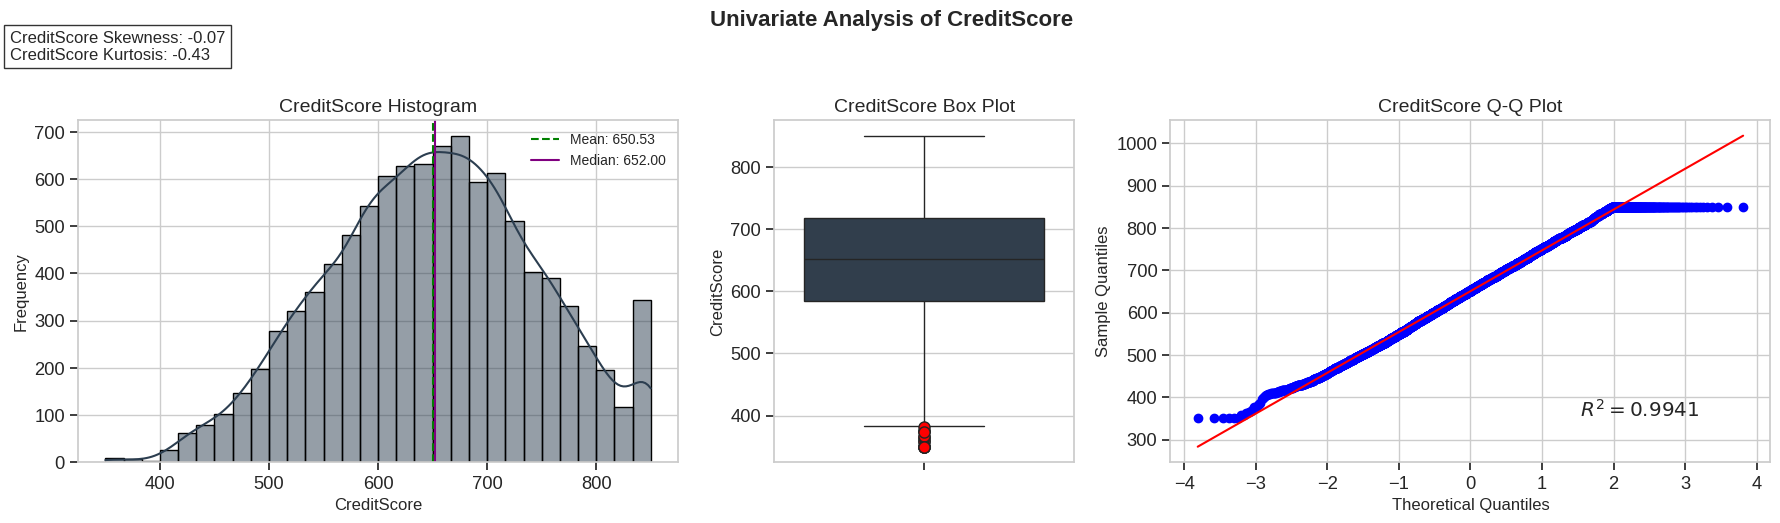

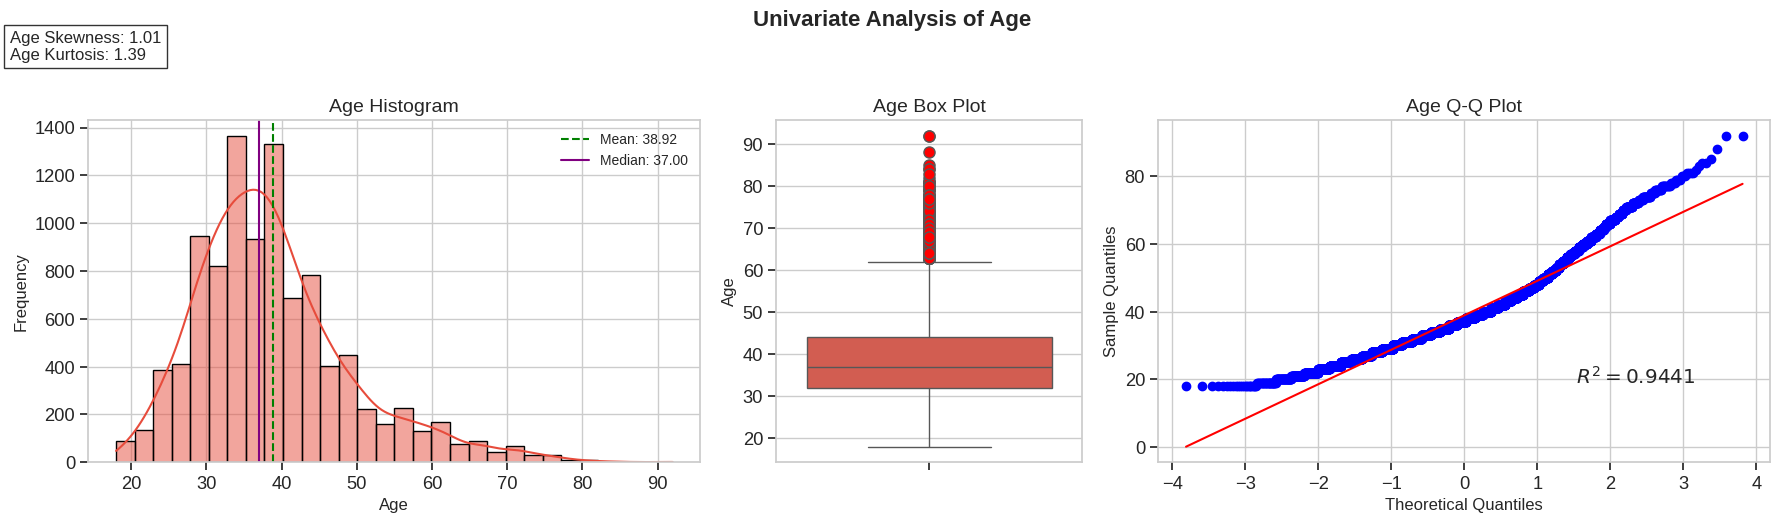

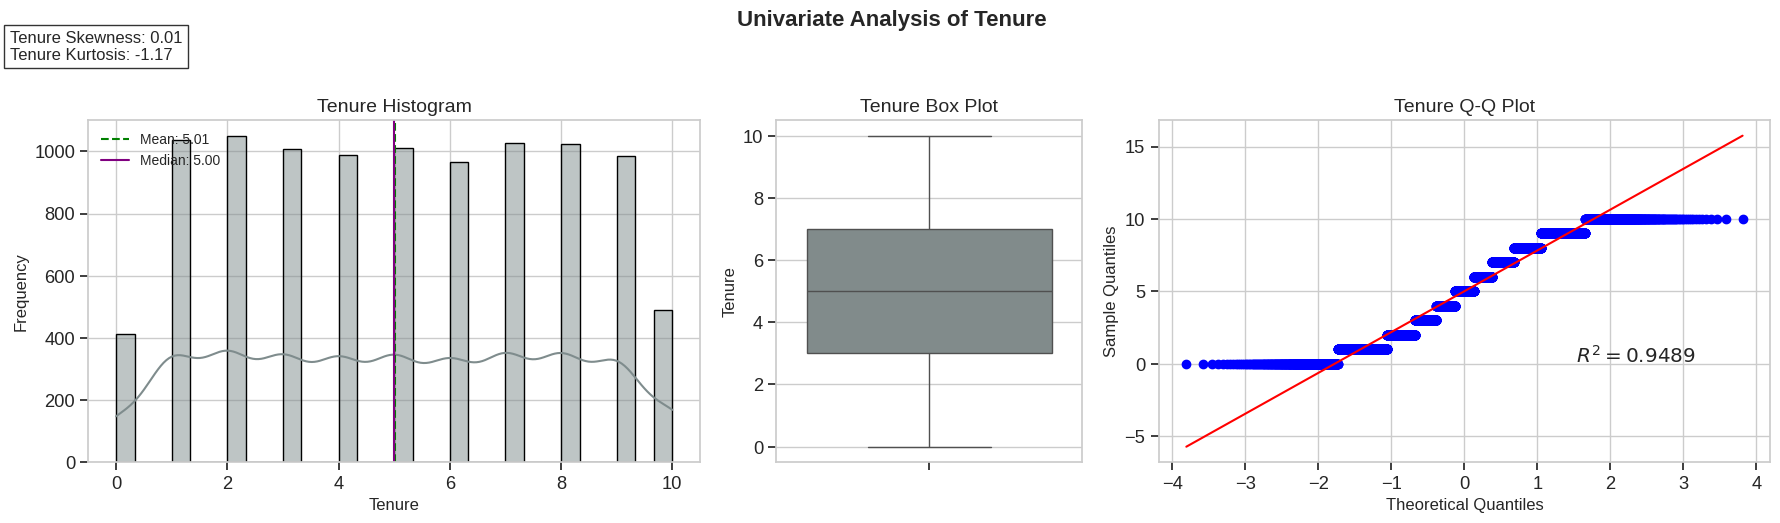

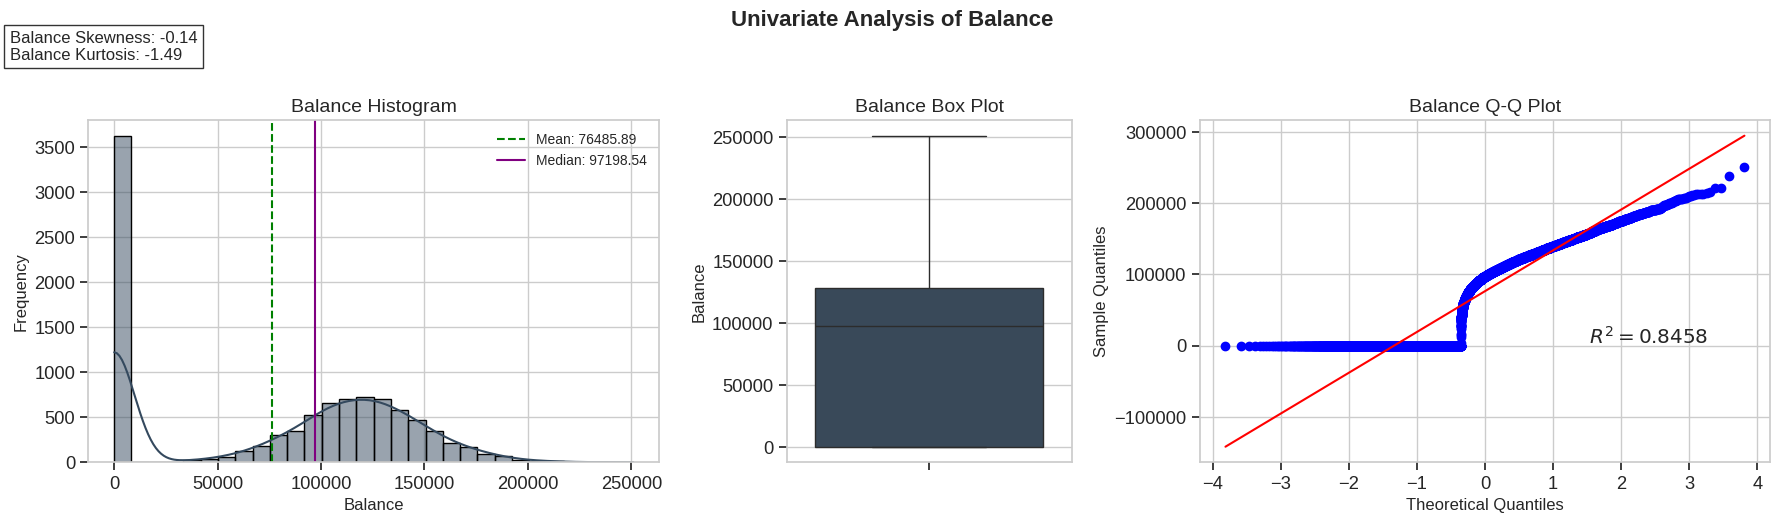

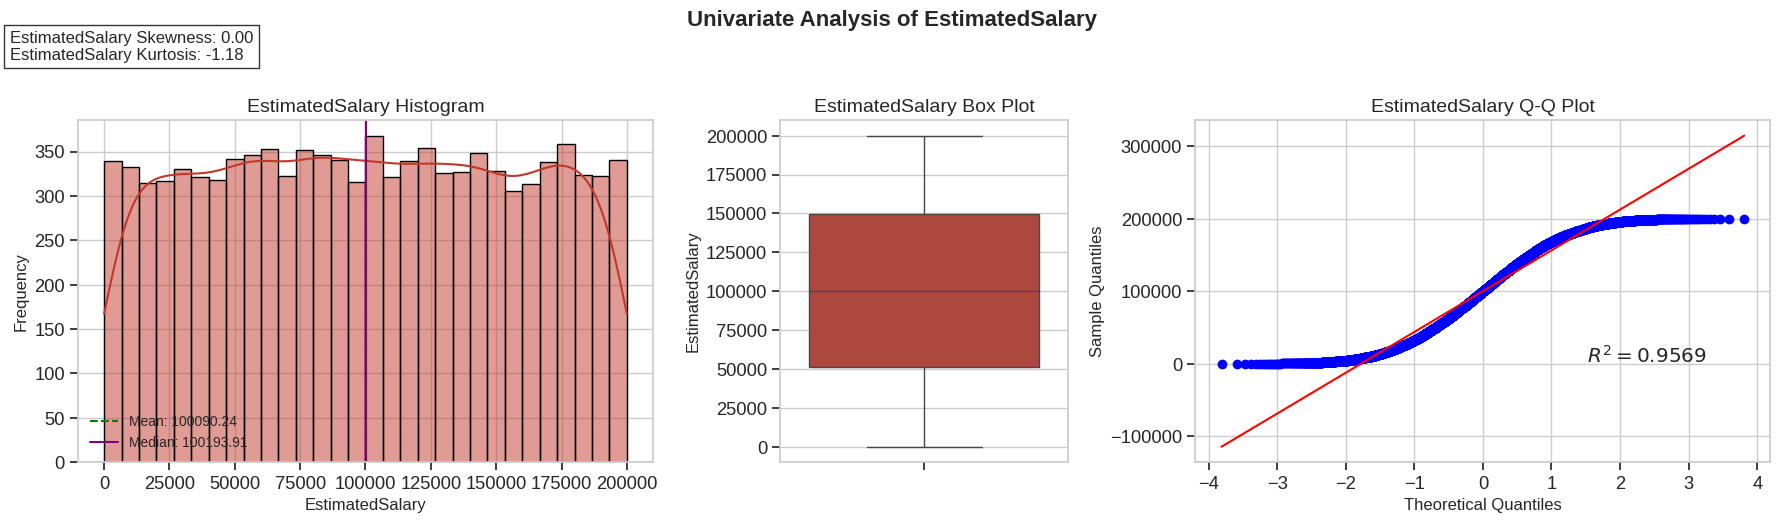

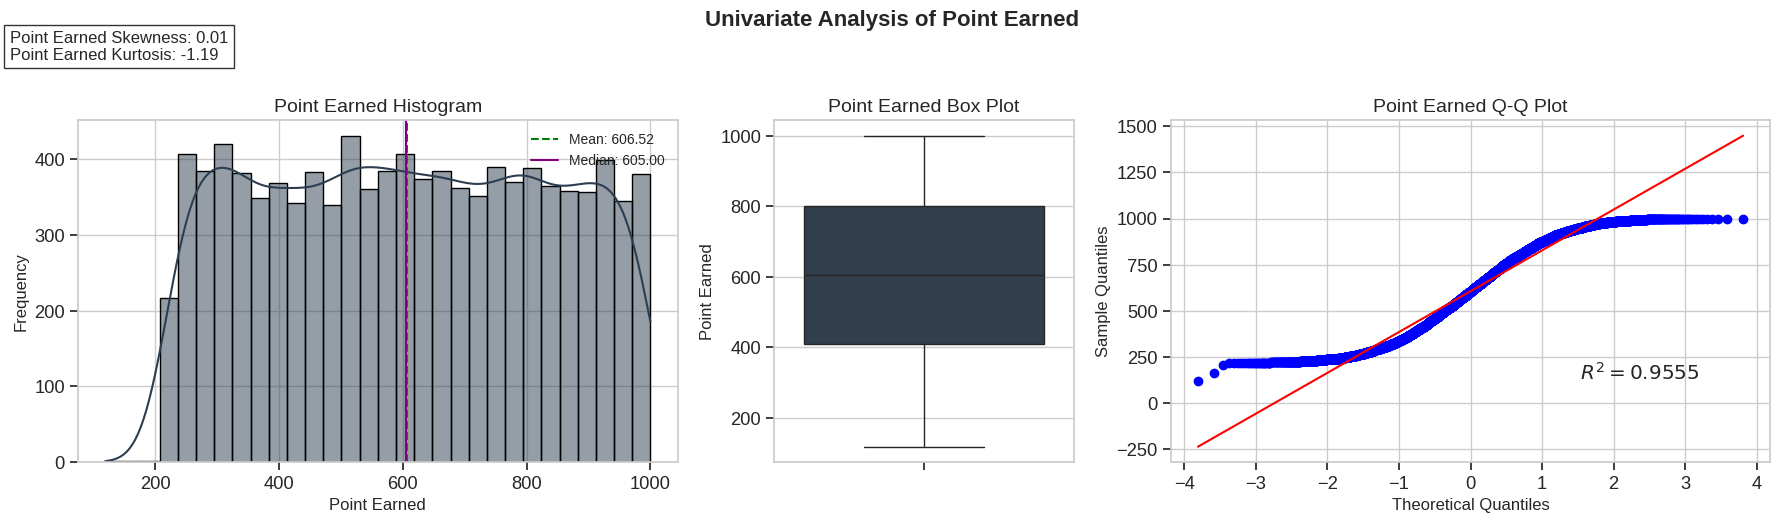

In [18]:
plot_distributions(data[numerical_cols], ordered_colors)

### Univariate Analysis: Numerical Features

This analysis explores the distributions of the key numerical features—CreditScore, Age, Tenure, Balance, EstimatedSalary, and Point Earned—in the Bank Customer Churn dataset. The goal is to interpret their univariate distributions, identify non-normality or unusual patterns, and propose specific preprocessing strategies for effective model building. We will leverage provided histograms, box plots, and summary statistics, including Q-Q plot $R^2$ values, as evidence.

---

#### Key Insights and Preprocessing Recommendations

The numerical features offer crucial insights into the bank’s customer base, guiding our feature engineering and modeling plan.

- **CreditScore (Mean: 650.53, Median: 652.0, Skewness: -0.07, Kurtosis: -0.43, R²: 0.9941)**  
  Distribution is highly symmetrical and nearly normal (Skewness: -0.07). The high $R^2$ (0.9941) confirms its excellent fit to a normal distribution, with only minor deviations in the lower tail (outliers below 400).
    - **Insight:** The majority of customers have healthy credit scores. The few low outliers (below 400) represent high-risk customers, which could be highly predictive of churn.<br>
    - **Action: No transformation** is required. The near-normal distribution is suitable for most linear and distance-based models.
<br>
<br>
- **Age (Mean: 38.92, Median: 37.0, Skewness: 1.01, Kurtosis: 1.39, R²: 0.9441)**  
  Distribution is strongly right-skewed (Skewness: 1.01), with a concentration of customers in their 30s and 40s. The low $R^2$ (0.9441) and the long upper tail confirm non-normality.
    - **Insight:** The customer base is relatively young. The long tail of older customers (outliers above ≈60) suggests a small but distinct segment. Since younger customers are often more likely to churn, managing this skew will be important for model performance.<br>
    - **Action: Apply a Log or Yeo-Johnson transformation** to reduce the skewness and stabilize the variance, improving the assumption compliance for many predictive models.
<br>
<br>
- **Tenure (Mean: 5.01, Median: 5.0, Skewness: 0.01, Kurtosis: -1.17, R²: 0.9489)**  
  Distribution is nearly uniform  across the range (0 to 10 years), with a near-zero skewness (0.01). The distribution is inherently discrete, which explains the $R^2$ (0.9489) not being perfect. No outliers were observed.<br>
    - **Insight:** Customer loyalty periods are evenly spread, meaning the bank does not have a disproportionate number of very new or very old customers.<br>
    - **Action: Scaling (StandardScaler or MinMaxScaler)** is the primary need, as transformation is unnecessary for a uniform, discrete variable.
<br>
<br>
- **Balance (Mean: 76485.89, Median: 97198.54, Skewness: -0.14, Kurtosis: -1.49, R²: 0.8458)**  
  Distribution of this feature is zero-inflated (a large peak at 0) and, for the non-zero portion, it is relatively spread. The median (97.2k) is significantly higher than the mean (76.5k), indicating that the mass of zero-balance accounts is dragging the mean down. The low $R^2$ (0.8458) highlights extreme non-normality.<br>
    - **Insight:** The large zero peak is critical: it represents a substantial group of inactive or savings-only customers. The non-zero group is a distinct population (active checking accounts). Modeling this as a single variable is sub-optimal.<br>
    - **Action: Feature Engineering** is essential. Create a new binary variable, "HasZeroBalance", and then, if necessary, transform the non-zero portion of the Balance variable separately.
<br>
<br>
- **EstimatedSalary (Mean: 100090.24, Median: 100193.92, Skewness: 0.00, Kurtosis: -1.18, R²: 0.9569)**  
  Distribution is highly uniform across its range (from ≈11.58 to ≈200k), with zero skewness (0.00). The $R^2$ (0.9569) is good for a uniform distribution, and there are no outliers.<br>
    - **Insight:** The bank’s customers represent a complete spectrum of income levels, with no particular income bracket dominating the dataset.<br>
    - **Action: Scaling (StandardScaler)** is sufficient. Transformation is unnecessary given its uniformity.
<br>
<br>
- **Point Earned (Mean: 606.52, Median: 605.0, Skewness: 0.01, Kurtosis: -1.19, R²: 0.9555)**  
  Distribution: Relatively uniform between 119 and 1000, with a slight central tendency (Skewness: 0.01). The $R^2$ (0.9555) is high, showing a well-behaved, near-uniform spread with no outliers.<br>
    - **Insight:** Customers show consistent engagement with credit card usage/rewards, suggesting no extreme outliers in point accumulation.<br>
    - **Action: Scaling (StandardScaler)** is the appropriate step to normalize the magnitude without altering the shape.

### Balance Revisited

  When only considering the non-zero balances, the distribution is highly symmetrical (Skewness: 0.03) and exhibits an excellent fit to a normal distribution. The high Q-Q plot $R^2$ of 0.9993 strongly confirms its near-perfect normality.
- **Insight:** This finding is crucial: the zero-inflated nature was the cause of non-normality in the original variable. By separating the two populations (zero balance vs. non-zero balance), the continuous part of the feature (Balance >0) is now exceptionally well-behaved (see below plots).<br>
- **Preprocessing Strategy and Rationale:**
    1. **Feature Engineering:** A new binary feature, "HasZeroBalance", has been created to capture the effect of an inactive or savings-only account. This addresses the structural issue of zero-inflation.
    2. **Multicollinearity Management:** If both the original Balance (including zero balance) and the new "HasZeroBalance" feature are kept in the model, would capture two distinct effects:
        - The binary effect: Does having any balance matter?
        - The continuous effect: Does the magnitude of the balance matter? This introduces multicollinearity, which will be managed in the modeling phase using regularization techniques (e.g., Lasso or Ridge regression) rather than discarding valuable information. However, there is still review to be done whether both variables will make it to the final model or not.<br>
    3. **Action: Scaling (StandardScaler)** of Balance will be suitable. Since this distribution is already virtually normal when not accounting for zeros and lacks significant outliers all together, scaling is preferred over a logarithmic transformation. A log transform would unduly compress the high balances, which, being within a highly symmetrical distribution, are already statistically realistic and informative.

 Case when zero balances have been removed from Balance:
 


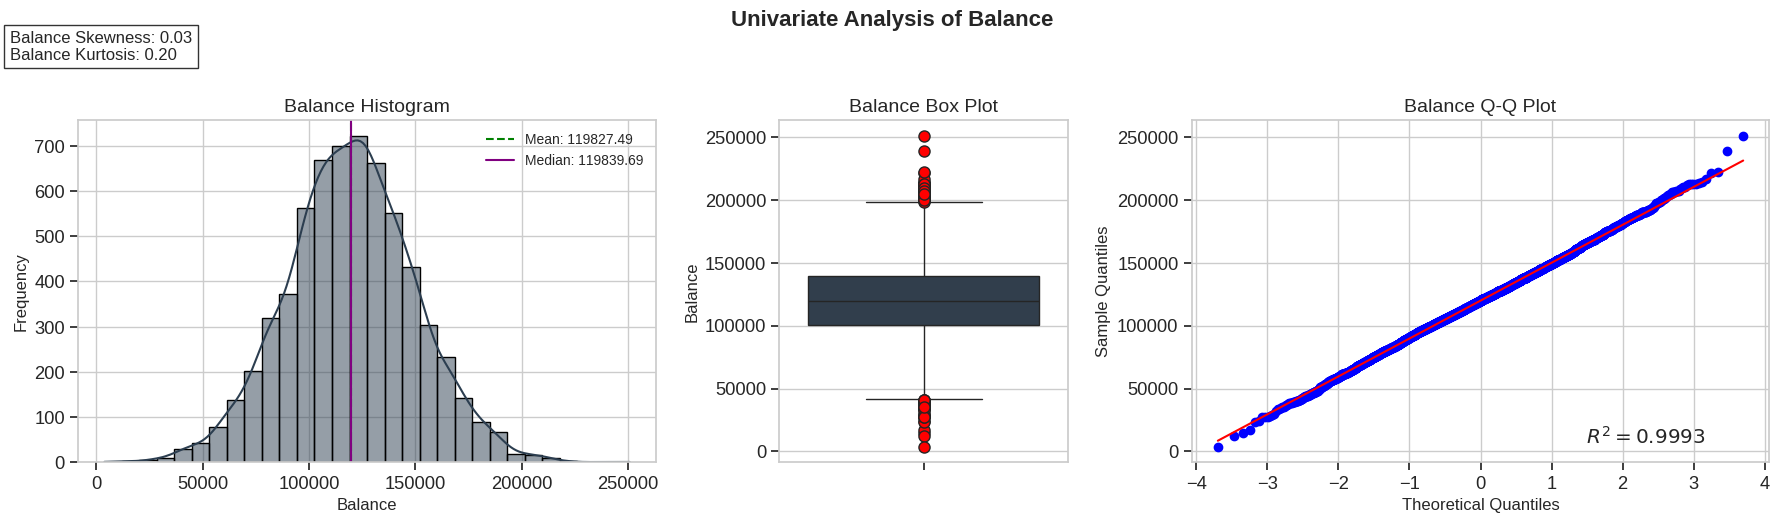

 


Case when original Balance is log1p transformed:
 


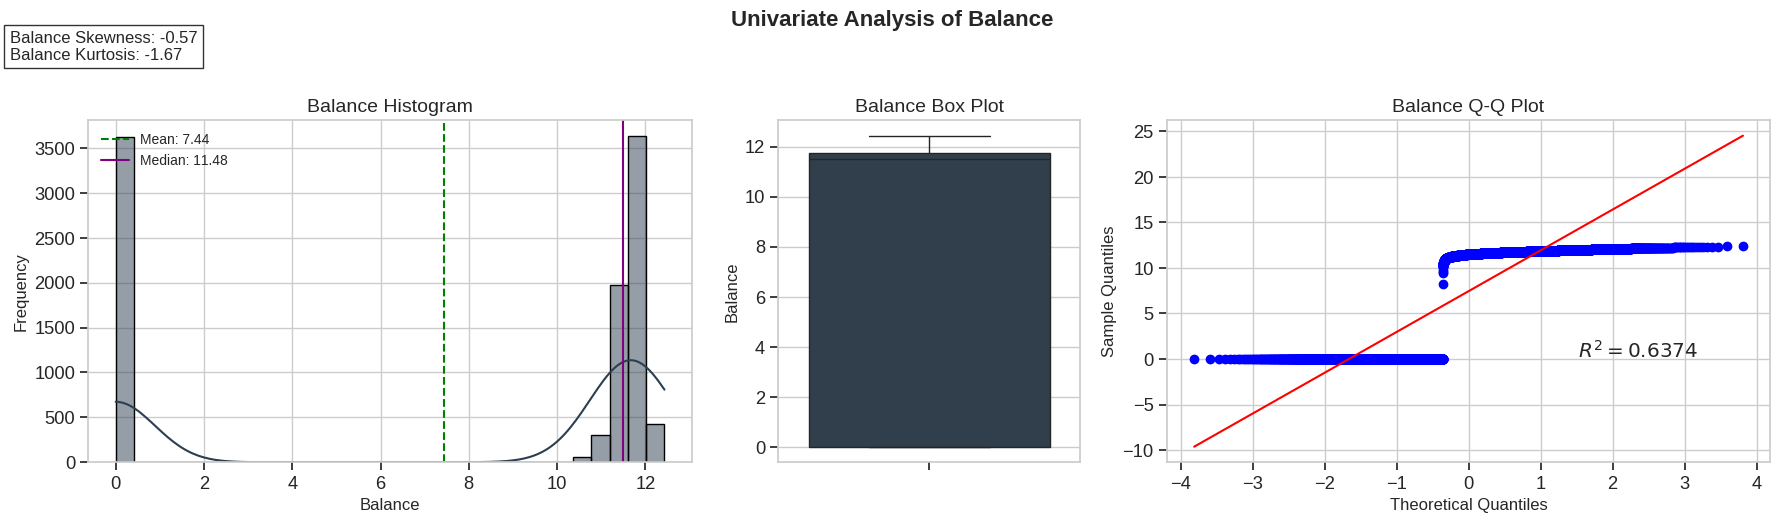

In [19]:
data['HasZeroBalance']= (data['Balance'] == 0).astype(int)
data['HasZeroBalance']= (data['HasZeroBalance']).astype('category')
categorical_cols.append('HasZeroBalance')

print(BOLD, 'Case when zero balances have been removed from Balance:\n',RESET)
plot_distributions(data[['Balance']][data['Balance'] > 0], ordered_colors)
print(BOLD, '\n\n\nCase when original Balance is log1p transformed:\n',RESET)
plot_distributions(np.log1p(data[['Balance']]), ordered_colors)


## Categorical Features Analysis

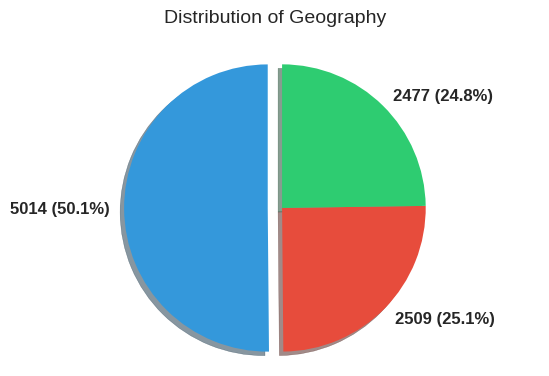

+---------+---------+--------------------------+
| Value   |   Count |   Relative Frequency (%) |
|---------+---------+--------------------------|
| France  |    5014 |                     50.1 |
| Germany |    2509 |                     25.1 |
| Spain   |    2477 |                     24.8 |
+---------+---------+--------------------------+




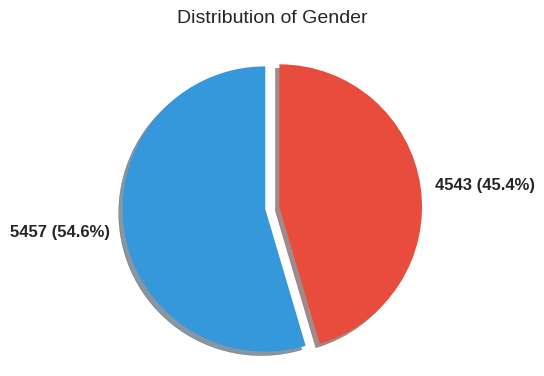

+---------+---------+--------------------------+
| Value   |   Count |   Relative Frequency (%) |
|---------+---------+--------------------------|
| Male    |    5457 |                     54.6 |
| Female  |    4543 |                     45.4 |
+---------+---------+--------------------------+




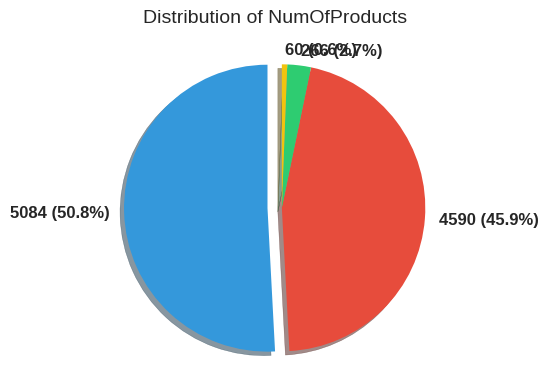

+---------+---------+--------------------------+
|   Value |   Count |   Relative Frequency (%) |
|---------+---------+--------------------------|
|       1 |    5084 |                     50.8 |
|       2 |    4590 |                     45.9 |
|       3 |     266 |                      2.7 |
|       4 |      60 |                      0.6 |
+---------+---------+--------------------------+




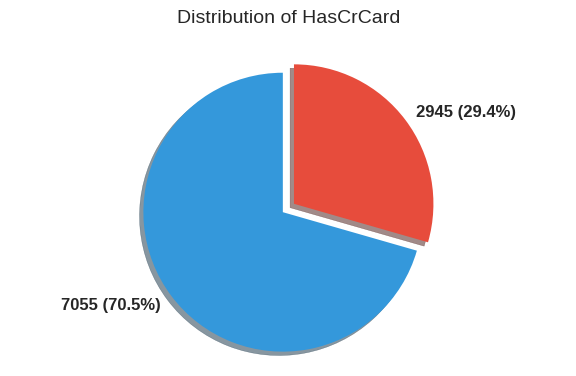

+---------+---------+--------------------------+
|   Value |   Count |   Relative Frequency (%) |
|---------+---------+--------------------------|
|       1 |    7055 |                     70.6 |
|       0 |    2945 |                     29.4 |
+---------+---------+--------------------------+




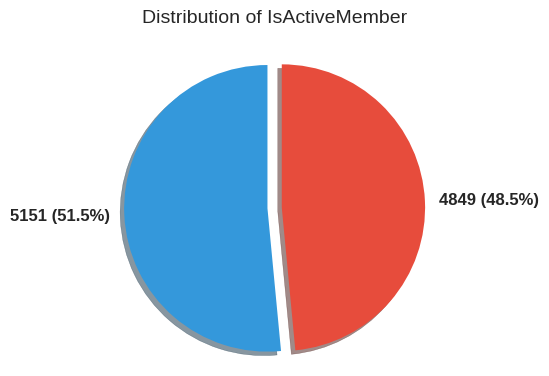

+---------+---------+--------------------------+
|   Value |   Count |   Relative Frequency (%) |
|---------+---------+--------------------------|
|       1 |    5151 |                     51.5 |
|       0 |    4849 |                     48.5 |
+---------+---------+--------------------------+




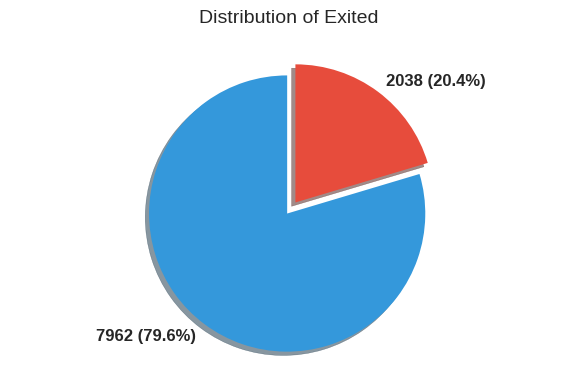

+---------+---------+--------------------------+
|   Value |   Count |   Relative Frequency (%) |
|---------+---------+--------------------------|
|       0 |    7962 |                     79.6 |
|       1 |    2038 |                     20.4 |
+---------+---------+--------------------------+




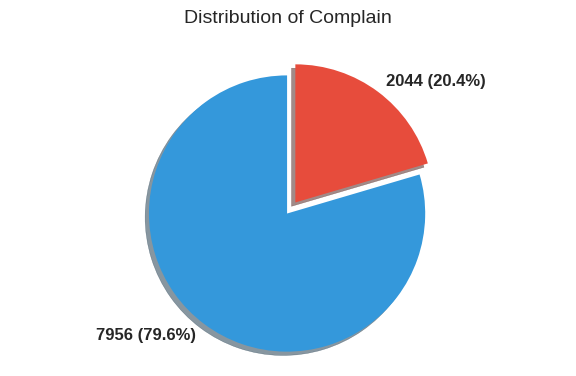

+---------+---------+--------------------------+
|   Value |   Count |   Relative Frequency (%) |
|---------+---------+--------------------------|
|       0 |    7956 |                     79.6 |
|       1 |    2044 |                     20.4 |
+---------+---------+--------------------------+




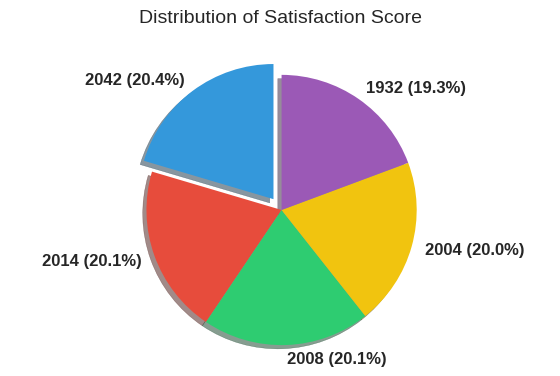

+---------+---------+--------------------------+
|   Value |   Count |   Relative Frequency (%) |
|---------+---------+--------------------------|
|       3 |    2042 |                     20.4 |
|       2 |    2014 |                     20.1 |
|       4 |    2008 |                     20.1 |
|       5 |    2004 |                     20   |
|       1 |    1932 |                     19.3 |
+---------+---------+--------------------------+




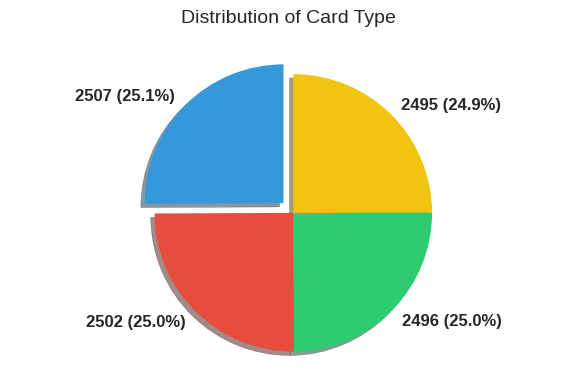

+----------+---------+--------------------------+
| Value    |   Count |   Relative Frequency (%) |
|----------+---------+--------------------------|
| DIAMOND  |    2507 |                     25.1 |
| GOLD     |    2502 |                     25   |
| SILVER   |    2496 |                     25   |
| PLATINUM |    2495 |                     25   |
+----------+---------+--------------------------+




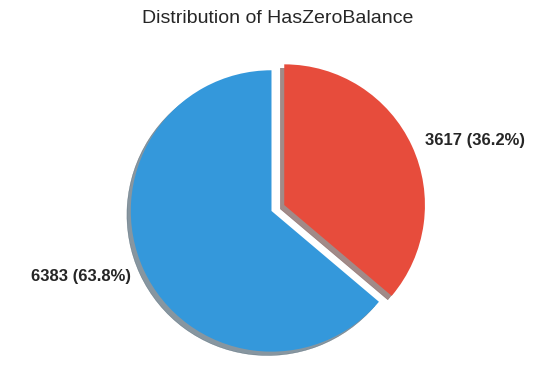

+---------+---------+--------------------------+
|   Value |   Count |   Relative Frequency (%) |
|---------+---------+--------------------------|
|       0 |    6383 |                     63.8 |
|       1 |    3617 |                     36.2 |
+---------+---------+--------------------------+




In [20]:
plot_categorical_features(data[categorical_cols])

### Univariate Analysis Insights: Categorical Features

This section presents the univariate analysis of the Bank Customer Churn dataset's categorical features, revealing critical insights into customer demographics and engagement. Understanding these distributions is vital for shaping our modeling approach and preprocessing strategy.

---

#### Insights: A Narrative of Customer Profiles

The distribution of the categorical variables highlights specific characteristics that either indicate high churn risk or present modeling challenges due to data imbalance:

- **Churn Rate (Exited) and Complaints:**
  The dataset shows a significant class imbalance, with 7,962 customers (79.6%) retaining the bank (0's) and 2,038 customers (20.4%) churning (1's). This low percentage of churners demands careful handling (like oversampling) in the modeling phase. Crucially, the Complain feature is nearly identical, with 2,044 customers (20.4%) having complaints, confirming that a formal complaint is potentially a powerful direct precursor to attrition.
<br>
<br>
- **Product Engagement (NumOfProducts):**
  The vast majority of the customer base is focused on low engagement: 5,084 customers (50.8%) have one product and 4,590 (45.9%) have two. Very few use three (266) or four (60). This dominance of low product count suggests limited engagement is a strong risk factor for churn.
<br>
<br>
- **Geographic and Gender Distribution:**
    - **Geography:** France dominates the customer base with 5,014 customers (50.1%), while Germany (2,509, 25.1%) and Spain (2,477, 24.8%) are almost evenly split. This significant regional skew suggests that geographic location may heavily influence churn and requires feature encoding.
    - **Gender:** The split is near-balanced, with Males (5,457, 54.6%) slightly outnumbering Females (4,543, 45.4%).
<br>
<br>
- **Loyalty and Activity:**
    - **Active Membership (IsActiveMember):** The group is split almost perfectly: 5,151 customers (51.5%) are active versus 4,849 (48.5%) inactive. Inactivity is a clear area of interest for predicting flight risk.
    - **Credit Card Ownership (HasCrCard):** A strong majority of customers, 7,055 (70.5%), hold a credit card, indicating that non-holders (2,945, 29.5%) represent a smaller, but potentially less loyal segment.
<br>
<br>
- **Uniformly Distributed Features:**
    - **Satisfaction Score:** Scores are highly uniform across levels (e.g., Score 3: 2,042; Score 5: 1,932), indicating consistent, non-dominant feedback. This even distribution might reduce its individual predictive value.
    - **Card Type:** All four types (DIAMOND: 2,507, GOLD: 2,502, SILVER: 2,496, PLATINUM: 2,495) are almost equally represented (~25% each), suggesting the specific card tier is unlikely to be an independent driver of churn.

---

#### Preprocessing Plan

Based on these findings, we will move forward with encoding the following nominal features:
- **Encoding Categorical Variables:** Geography, Gender, and Card Type will be transformed into numerical features using one-hot encoding, as they lack any inherent ordinal relationship.
- **Handling Ordinal Variables:** Satisfaction Score and NumOfProducts inherently contain rank information (ordinality), however they will also be transformed using one-hot encoding to assess the purely predictive nature of each level.
- **Binary Features (Ready to Use):** The variables Exited, Complain, HasCrCard, IsActiveMember, and HasZeroBalance are already encoded as binary (0 or 1). No further preprocessing or encoding is required for these features.

---

<a id="2.2"></a>
<h2 style="background-color:orange;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">2.2 Bivariate Analysis: Linking Features to Churn</h2>

Following the univariate insights, the next critical step is the Bivariate Analysis. This phase shifts focus to how individual features interact with our target variable, Exited (Churn). Our primary goal is to move beyond simple distributions and systematically identify the true correlations and dependencies that drive customer attrition. We will use visualization techniques, such as box plots, heatmaps, and contingency tables, alongside calculated correlation coefficients, to uncover the most predictive relationships. The findings here will directly inform our final feature selection and influence subsequent modeling decisions.

## Correlation Analysis

To clearly identify the factors most strongly associated with customer churn, we segmented our correlation analysis into four strategic categories: Demographics, Financials, Engagement, and Feedback. This approach allows us to easily visualize how variables relate to our target outcome, Exiting (Churn), as well as how variables within each group interact.

We used Spearman's Rank Correlation for this analysis because the underlying data distribution for most variables is non-normal. To include our categorical data, all such variables were converted into binary (0 or 1) indicators.

Our initial analysis focuses on the demographics group: Geography, Gender, and Age. Reviewing the correlation results (specifically the row for "Exited_1" [Churn]), we observe the following key insights regarding customer characteristics:

- Age is the strongest demographic driver of churn with a correlation of 0.32. This suggests that older customers are significantly more likely to exit.

- Geography is the second most correlated factor. Customers located in Germany show a higher association with exiting compared to customers in other regions within our dataset.

- Gender also shows a measurable correlation. Specifically, the data indicates a positive correlation with the female segment and a negative correlation with the male segment. This suggests that female customers are disproportionately associated with the decision to churn in our sample.

This early segmentation helps us prioritize which customer profiles (older, female, German-based) require immediate attention and targeted retention strategies.

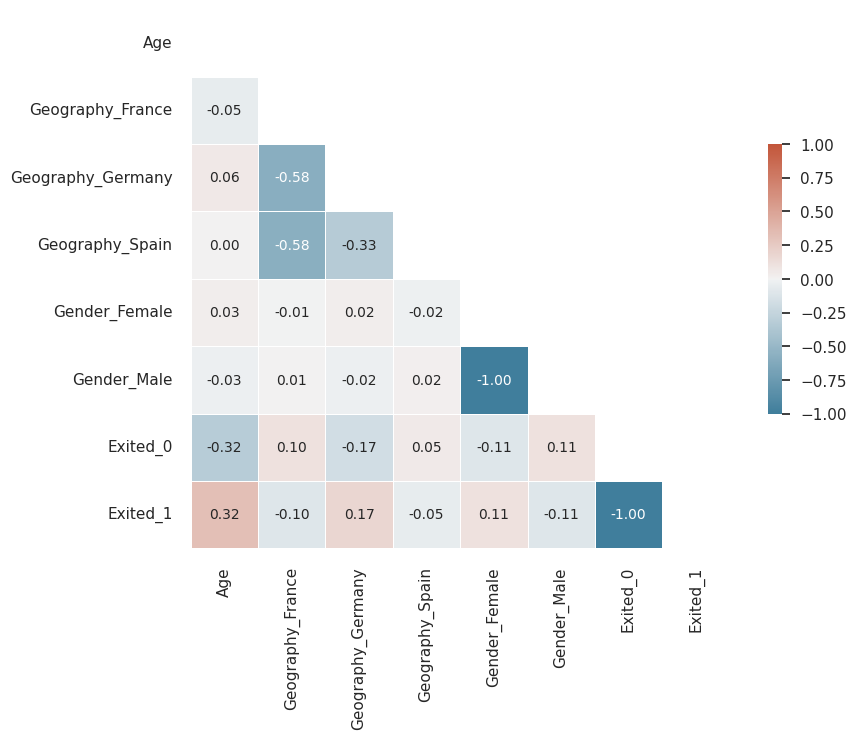

In [21]:
demog_cols= ['Geography', 'Gender', 'Age']
fin_cols= ['EstimatedSalary', 'Balance', 'HasZeroBalance', 'CreditScore']
engage_cols= ['Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Card Type', 'Point Earned']
feedback_cols= ['Complain', 'Satisfaction Score']
target_col= ['Exited']

corr_plot_func(data_df=data[demog_cols+target_col], corr_type= 'spearman', figsize=(10,7), dec_place=2, 
               create_dummies=True)

Next, we examined the customer financial data group, which includes Estimated Salary, Account Balance (continuous), Has Zero Balance (binary), and Credit Score.

Looking at the correlation results with the Exited (Churn) outcome, we find that the variables in this group generally show weak correlations with churn.

- The highest, albeit still low, correlations are observed with Account Balance (continuous) and the Has Zero Balance indicator.

- Balance as a continuous variable shows a positive correlation with churn, meaning customers with larger account balances are slightly more associated with exiting.

- The binary variable Has Zero Balance shows a negative correlation. This is logical: since the binary variable is coded '1' for a zero balance, the negative correlation indicates that customers with zero balances are less associated with exiting compared to those who hold money with the bank.<br>


Given the similar, small magnitude of correlation for these two Balance-related variables, they essentially provide **redundant information** regarding the likelihood of churn. Overall, the financial data, outside of Balance itself, is not a primary driver of churn in this model.

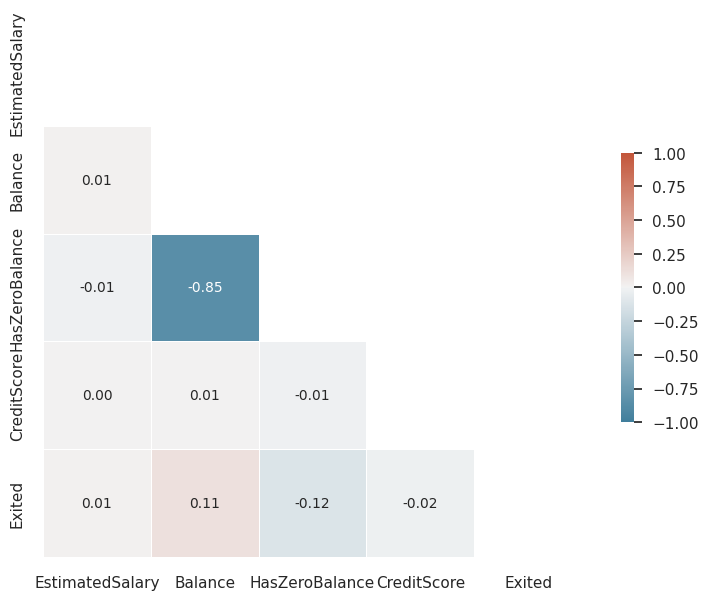

In [22]:
corr_plot_func(data_df=data[fin_cols+target_col], corr_type= 'spearman', figsize=(10,7), dec_place=2, 
               create_dummies=False)

We next analyzed customer engagement data, including Tenure, Points Earned, Number of Products, Credit Card Ownership, Active Member Status, and Card Type.

Looking at the correlation results with Exited (Churn), the key drivers are Number of Products and Active Member Status.

- Number of Products shows the most significant correlation within this group. Intriguingly, customers holding two products are more likely to be retained (less likely to exit) compared to those with one, three, or four products, all of which show a higher association with churn. This finding highlights a specific retention sweet spot at the two-product level and warrants deeper investigation.

- Active Member Status shows the expected negative correlation with churn. This confirms that customers who are flagged as Active Members are less likely to exit compared to those who are inactive.

Other variables like Tenure, Points Earned, and Credit Card Ownership showed negligible correlation with the churn outcome. This suggests that retention efforts should heavily prioritize **increasing active member rates** and understanding the dynamics around **product bundling**.

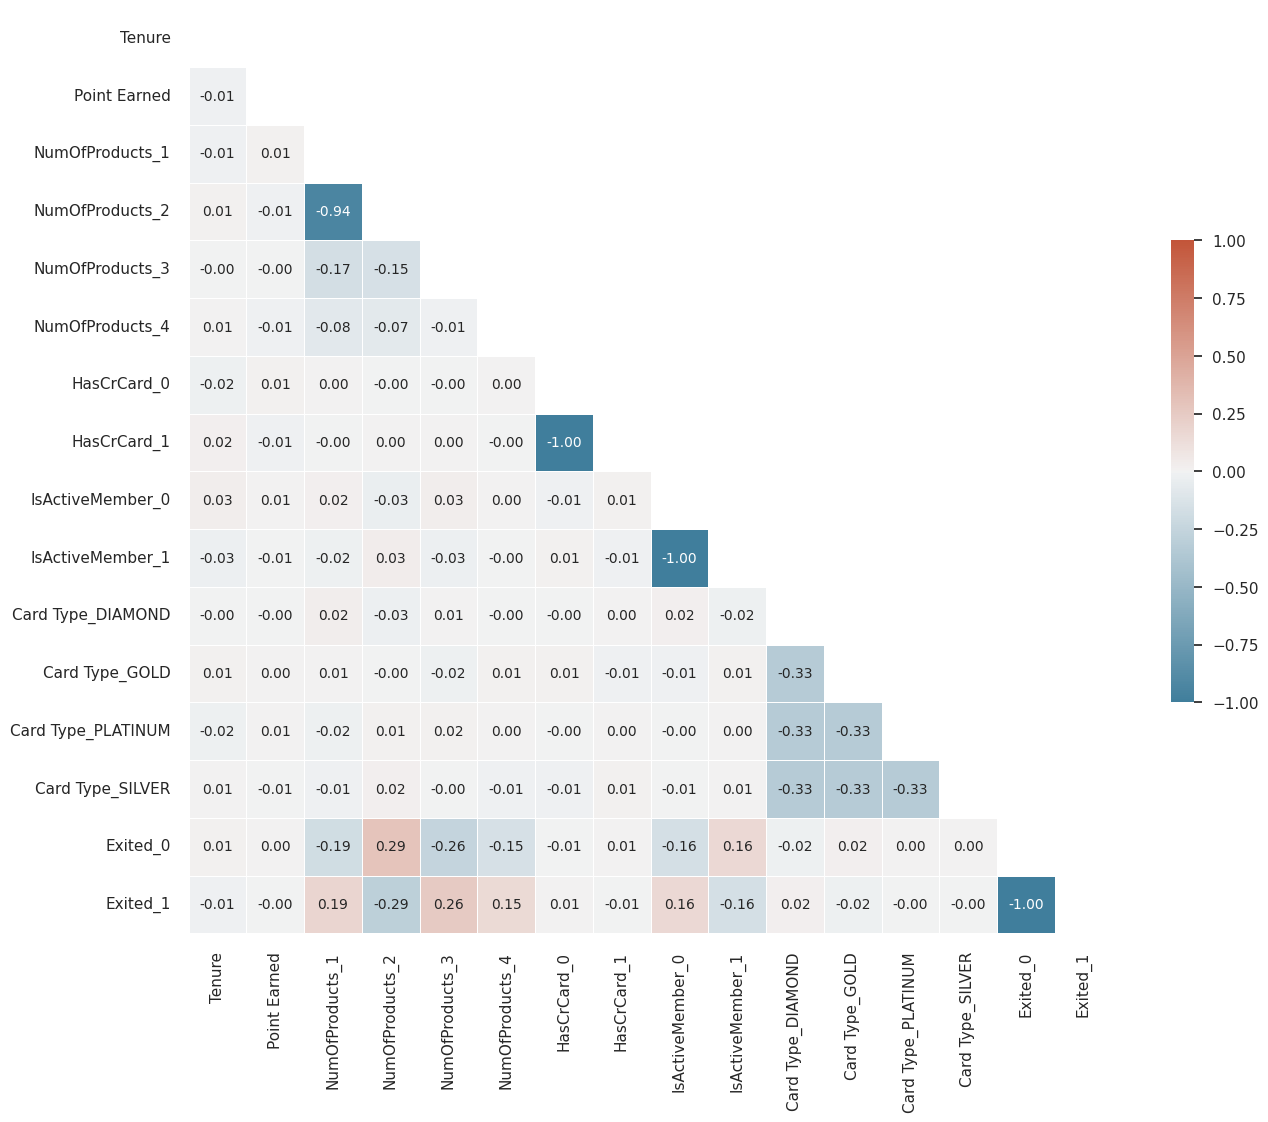

In [23]:
corr_plot_func(data_df=data[engage_cols+target_col], corr_type= 'spearman', figsize=(15,12),dec_place=2, 
               create_dummies=True)

Finally, we examined the customer feedback data, which includes a Complaint indicator (did the customer complain?) and their Satisfaction Score regarding complaint resolution.

Our analysis of the correlation with Exited (Churn) reveals a significant disparity:

- We found no discernible correlation between a customer's Satisfaction Score regarding issue resolution and their decision to exit. This suggests that simply resolving a complaint may not prevent churn if the underlying issue is severe.

- In stark contrast, we observe an extremely strong, almost perfect correlation between customers who complain and those who subsequently exit.

This near-perfect correlation between filing a complaint and churning is an extreme finding that clearly identifies complaints as a **critical and immediate precursor to customer loss**. This warrants immediate and deeper investigation.

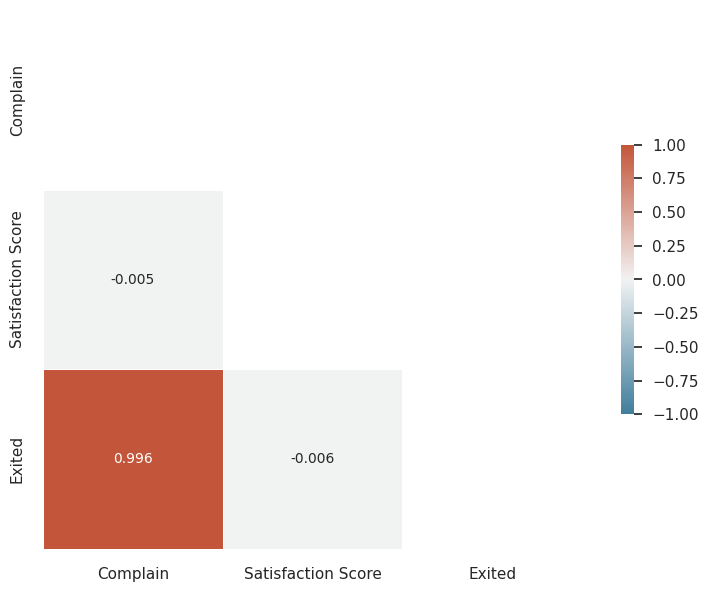

In [24]:
corr_plot_func(data_df=data[feedback_cols+target_col], corr_type= 'spearman', figsize=(10,7), dec_place=3,
               create_dummies=False)

After analyzing correlations within each segment, we ran all inter-group correlations and identified the **top 30 strongest relationships (by absolute value)** across the entire dataset.

The variables that demonstrate the highest and most frequent correlations across different business categories are: Geographical Location, Number of Products, Has Zero Balance, Complaint Indicator, Active Member Status, and Age.

This prioritized list of six variables will be critical. It confirms that the most influential variables regarding customer behavior are not isolated; they frequently interact across the Demographics, Financials, and Engagement categories. We will use these top cross-category correlations to guide the next phase of our analysis, focusing on how these relationships collectively drive the decision to exit.

In [25]:
# Inter-group correlations
# Group the lists for easy iteration
column_groups = [pd.get_dummies(data[demog_cols], dtype=float).columns.to_list(),
                 pd.get_dummies(data[fin_cols], dtype=float).columns.to_list(), 
                 pd.get_dummies(data[engage_cols], dtype=float).columns.to_list(),
                 pd.get_dummies(data[feedback_cols], dtype=float).columns.to_list()]

# Total number of groups
num_groups = len(column_groups)

all_cross_product_pairs=[]

# Iterate through all unique pairs of groups (Group A vs. Group B, avoiding repeats)
for i in range(num_groups):
    for j in range(i + 1, num_groups):
        list_A = column_groups[i]
        list_B = column_groups[j]
        
        # Calculate the Cartesian product (all pairs)
        cross_product_pairs = list(it_product(list_A, list_B))
        all_cross_product_pairs= all_cross_product_pairs + cross_product_pairs


# Use combinations to obtain correlations
data_dummies= pd.get_dummies(data, dtype=float)
results= []
for i,j in all_cross_product_pairs:
    r = data_dummies[i].corr(data_dummies[j], method='spearman')

    results.append({
        'Var1': i,
        'Var2':j,
        'correlation': r
    })

results_df= pd.DataFrame(results).sort_values(by='correlation', key=abs, ascending=False).reset_index(drop=True)
display(results_df.head(30))

,Var1,Var2,correlation
0,Geography_Germany,HasZeroBalance_1,-0.44
1,Geography_Germany,HasZeroBalance_0,0.44
2,HasZeroBalance_1,NumOfProducts_2,0.39
3,HasZeroBalance_0,NumOfProducts_2,-0.39
4,HasZeroBalance_1,NumOfProducts_1,-0.39
5,HasZeroBalance_0,NumOfProducts_1,0.39
6,Geography_Germany,Balance,0.37
7,Balance,NumOfProducts_2,-0.34
8,Balance,NumOfProducts_1,0.33
9,Age,Complain_1,0.32


## Effect of complaints on curn

The Complain variable has demonstrated a near-perfect predictive relationship with churn. Almost every customer who exited the bank ($\text{Churn}=1$) first filed a complaint ($\text{Complain}=1$). Conversely, scarcely any non-complaining customers exited. This makes Complain an exceptionally powerful predictor.<br>
While highly predictive, this near-perfect relationship introduces a technical problem known as quasi-complete separation . This statistical instability causes the estimated coefficients in models like logistic regression (and their associated standard errors) to become unstable, inflated, or mathematically unreliable.<br>
Our primary objective is to predict churn among the existing customer base. Given this goal, the Complain variable is an indispensable, early indicator of risk. We will therefore retain this variable, treating customers who complain as a high-threat cohort on the verge of attrition.<br>
- Note on Alternative Goals: If the modeling goal were to predict the churn propensity of a ***new*** customer (before any service interaction), we would be forced to remove Complain, as its value would be unknown at the time of prediction. Since we are modeling current customer risk, retention is justified.<br>

To manage the statistical instability caused by the separation, we will apply regularization techniques (such as L1 or L2 penalties) to stabilize the model's coefficient estimates.
Our current analytical focus shifts to the small, crucial group of 10 customers who complained but ultimately chose to stay and the 4 customers who churned but did not have a complaint. Identifying the unique characteristics and mitigating factors that prevented their churn is now our top priority, as these insights are invaluable for developing effective retention strategies.

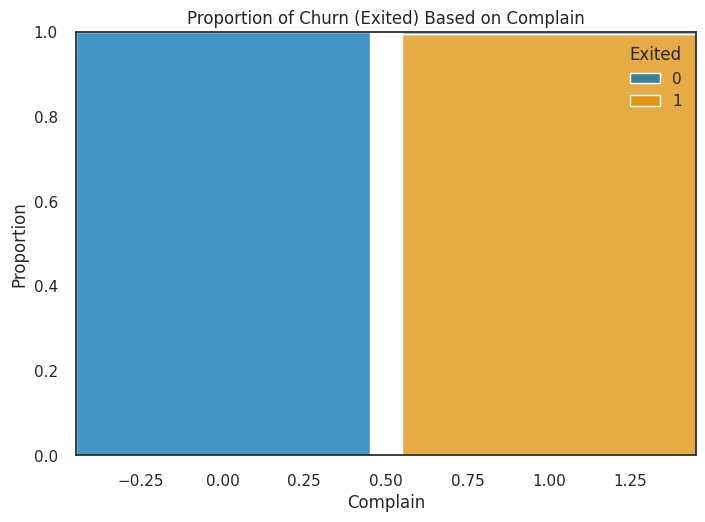



Count of customer's who complained but didn't churn:  10


Count of customer's who churned but didn't complain:  4


In [26]:
sns.histplot(data=data, x= 'Complain', hue= 'Exited', multiple='fill', stat='proportion', discrete=True, shrink=.9, \
            palette='colorblind')
plt.title('Proportion of Churn (Exited) Based on Complain')
plt.show()

print('\n\nCount of customer\'s who complained but didn\'t churn: ', 
      len(data[(data['Complain']==1) & (data['Exited']==0)]))
print('\n\nCount of customer\'s who churned but didn\'t complain: ', 
      len(data[(data['Complain']==0) & (data['Exited']==1)]))

## Product Engagement Effect on Churn

The number of products a customer holds is a strong predictor of churn volatility. The sweet spot for retention is two products ($\sim 6\%$ churn). Beyond this, customers become high risk. Three products jump to $\sim 81\%$ churn, and four products result in near-total loss.<br>
**Action:** This requires immediate investigation by a dedicated task force. Current pricing, bundling, or service model is driving away the most engaged customers.

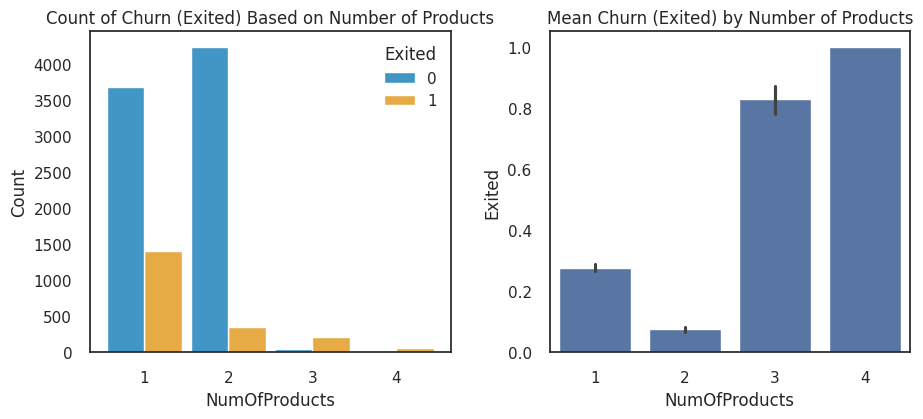

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

sns.histplot(data=data, x= 'NumOfProducts', hue= 'Exited', multiple='dodge', stat='count', discrete=True, shrink=.9, \
            palette='colorblind', ax=axes[0])
axes[0].set_title('Count of Churn (Exited) Based on Number of Products')


sns.barplot(
    data=data, x="NumOfProducts", y="Exited", ax=axes[1]
)
axes[1].set_title('Mean Churn (Exited) by Number of Products')
axes[1].invert_yaxis()

fig.tight_layout(pad=3.0, w_pad=2.0, h_pad=2.0)

plt.show()

In [28]:
contingency_table = pd.crosstab(data['NumOfProducts'], data['Exited'])
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
print(f'Chi-Square Statistic: {chi2:.3f}, p-value: {p_value:.3f}')

Chi-Square Statistic: 1501.505, p-value: 0.000


## Geographical Effects on Churn

The geographical distribution of churn is statistically significant. While France and Spain successfully retained the highest proportion of customers (about 17%), Germany saw an absolute number of churned customers equal to France, representing a 1:3 churn-to-retention ratio.

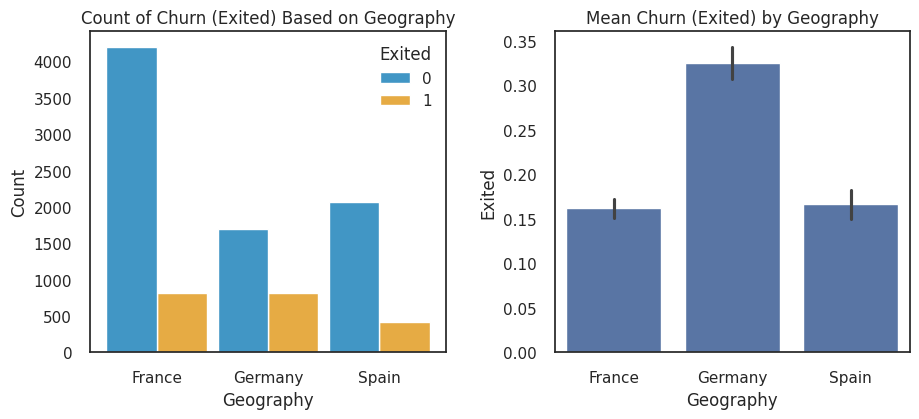

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

sns.histplot(data=data, x= 'Geography', hue= 'Exited', multiple='dodge', stat='count', discrete=True, shrink=.9, \
            palette='colorblind', ax=axes[0])
axes[0].set_title('Count of Churn (Exited) Based on Geography')

sns.barplot(
    data=data, x="Geography", y="Exited", ax=axes[1]
)
axes[1].set_title('Mean Churn (Exited) by Geography')
axes[1].invert_yaxis()
fig.tight_layout(pad=3.0, w_pad=2.0, h_pad=2.0)

plt.show()

In [30]:
contingency_table = pd.crosstab(data['Geography'], data['Exited'])
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
print(f'Chi-Square Statistic: {chi2:.3f}, p-value: {p_value:.3f}')

Chi-Square Statistic: 300.626, p-value: 0.000


## Gender Effects on Churn

A statistically significant disparity exists in churn rates between genders. Women churn at a rate of approximately 25%, which is substantially higher than the roughly 15% churn rate observed for men. This significant finding holds true even though the sample slightly favors men (5% more men than women).

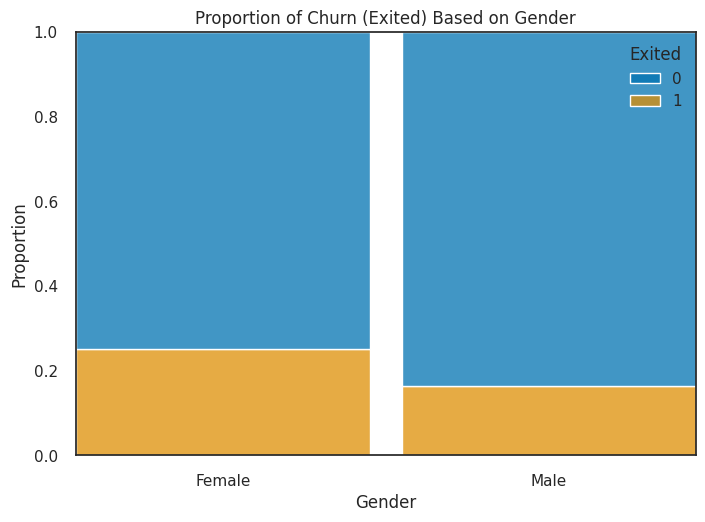

In [31]:
sns.histplot(data=data, x= 'Gender', hue= 'Exited', multiple='fill', stat='proportion', discrete=True, shrink=.9, \
            palette='colorblind')
plt.title('Proportion of Churn (Exited) Based on Gender')
plt.show()

In [32]:
contingency_table = pd.crosstab(data['Gender'], data['Exited'])
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
print(f'Chi-Square Statistic: {chi2:.3f}, p-value: {p_value:.3f}')

Chi-Square Statistic: 112.397, p-value: 0.000


## Active Members Effects on Churn

Customer activity has a statistically significant effect on churn: Inactive members churn at a rate of nearly 25%, which is dramatically higher than the $\approx 15\%$ rate seen among active members.

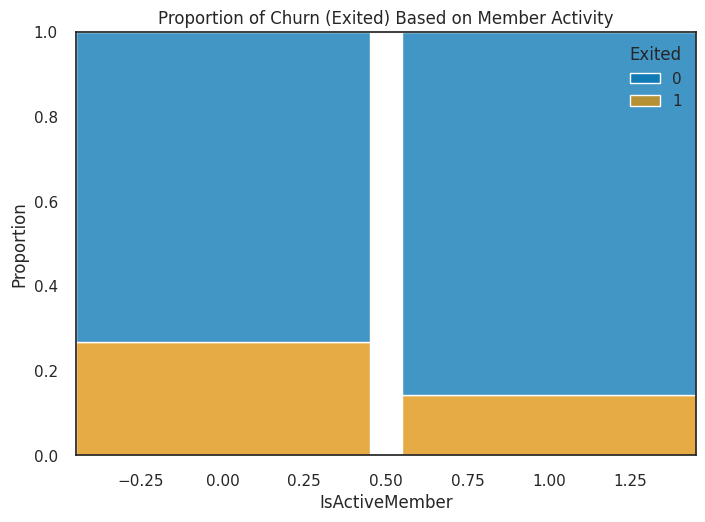

In [33]:
sns.histplot(data=data, x= 'IsActiveMember', hue= 'Exited', multiple='fill', stat='proportion', discrete=True, shrink=.9, \
            palette='colorblind')
plt.title('Proportion of Churn (Exited) Based on Member Activity')
plt.show()

In [34]:
contingency_table = pd.crosstab(data['IsActiveMember'], data['Exited'])
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
print(f'Chi-Square Statistic: {chi2:.3f}, p-value: {p_value:.3f}')

Chi-Square Statistic: 243.695, p-value: 0.000


## Zero Balance Members Effects on Churn

A statistically significant disparity exists in churn based on account balance. Customers with a positive balance churn at a much higher rate (around 24%) than those with a zero balance (about 14%). This result is counter-intuitive, as it suggests that holding a balance is associated with a greater likelihood of exiting, despite the prior finding that inactive customers (who often have zero balances) are typically higher risk. Unfortunately we do not have the right data to dive deeper into this question.

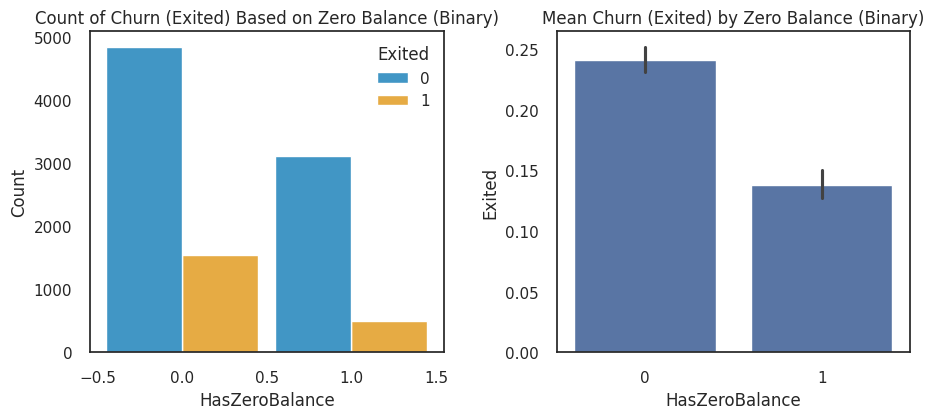

In [35]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

sns.histplot(data=data, x= 'HasZeroBalance', hue= 'Exited', multiple='dodge', stat='count', discrete=True, shrink=.9, \
            palette='colorblind', ax=axes[0])
axes[0].set_title('Count of Churn (Exited) Based on Zero Balance (Binary)')


sns.barplot(
    data=data, x="HasZeroBalance", y="Exited", ax=axes[1]
)
axes[1].set_title('Mean Churn (Exited) by Zero Balance (Binary)')
axes[1].invert_yaxis()

fig.tight_layout(pad=3.0, w_pad=2.0, h_pad=2.0)

plt.show()

In [36]:
contingency_table = pd.crosstab(data['HasZeroBalance'], data['Exited'])
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
print(f'Chi-Square Statistic: {chi2:.3f}, p-value: {p_value:.3f}')

Chi-Square Statistic: 149.484, p-value: 0.000


## Effects of Age on Churn

The analysis of Age reveals a substantial difference in distributions between customers who exited (1) and those who did not (0), establishing age as a highly significant predictor of churn.<br>
Specifically, the majority of active (non-exited) customers are concentrated in a younger demographic, with their core age range lying between 30 and 41 years old. In sharp contrast, customers who have churned are notably older, with their core age range spanning 38 to 51 years. This upward shift in age for the Exited group strongly suggests that older customers are at a significantly higher risk of attrition.<br>
>The disparity in the median ages between the two cohorts is also statistically significant, further confirming that this relationship is not due to random chance and solidifying Age as a critical factor in predicting customer departure.

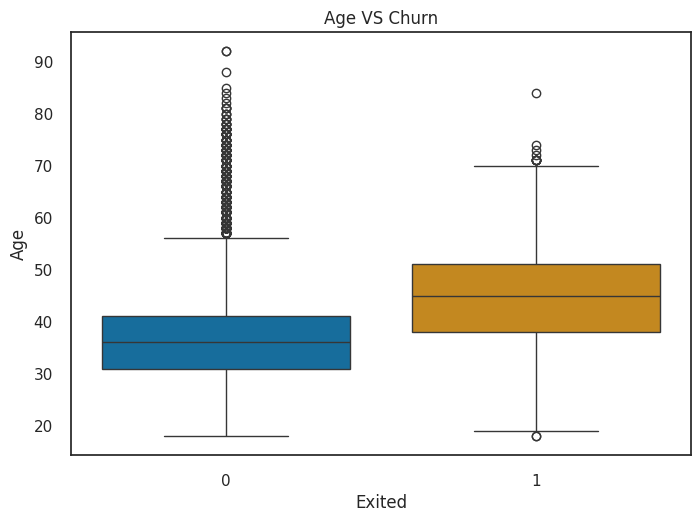

In [37]:
sns.boxplot(data=data, x= 'Exited', y= 'Age', palette='colorblind')
plt.title('Age VS Churn')
plt.show()

In [38]:
exited_0 = data[data['Exited'] == 0]['Age']
exited_1 = data[data['Exited'] == 1]['Age']
stat, p_value = stats.mannwhitneyu(exited_0, exited_1)
print(f'Mann-Whitney U Statistic: {stat:.3f}, p-value: {p_value:.3f}')

Mann-Whitney U Statistic: 4347741.000, p-value: 0.000


## Effects of Overall Balance on Churn

An analysis of the balance distributions for customers with a positive balance (for example, by looking at histograms separated by churn status) reveals a key insight: the density distributions for customers who churned and those who did not are remarkably similar. This finding suggests that holding a very high positive balance, compared to a moderate positive balance, does not inherently change a customer's likelihood of leaving the service.

We must be careful when testing the statistical significance of the raw Balance variable (the continuous variable) across its entire range. The distribution of non-churned customers has a significantly higher proportion of zero-balance accounts than the distribution of churned customers. If we test for significance using the entire balance range (including zeros), we will get a statistically significant result. However, this significance is misleading; it's entirely driven by the mean rank difference between zero-balance and positive-balance accounts, not by the variation within the positive balances. To correctly isolate the effect of the continuous balance, we must test for significance only on the subset of customers with a positive balance. When we do this, the positive balance is not a statistically significant predictor of churn. The observed statistical difference when using the full variable is wholly attributable to the overwhelming disparity in the proportion of non-exited customers who maintain a zero balance.

**Recommendation:**<br>
Because the predictive power is concentrated solely at the distinction between a zero balance and a positive balance, the continuous raw Balance variable is not a useful predictor on its own. The binary feature HasZeroBalance (a value of 1 for zero balance, 0 for positive balance) captures all the necessary information more effectively and parsimoniously. We should rely on the binary HasZeroBalance feature and potentially exclude the raw continuous Balance variable from the final predictive model. This simplifies the model without sacrificing predictive accuracy.

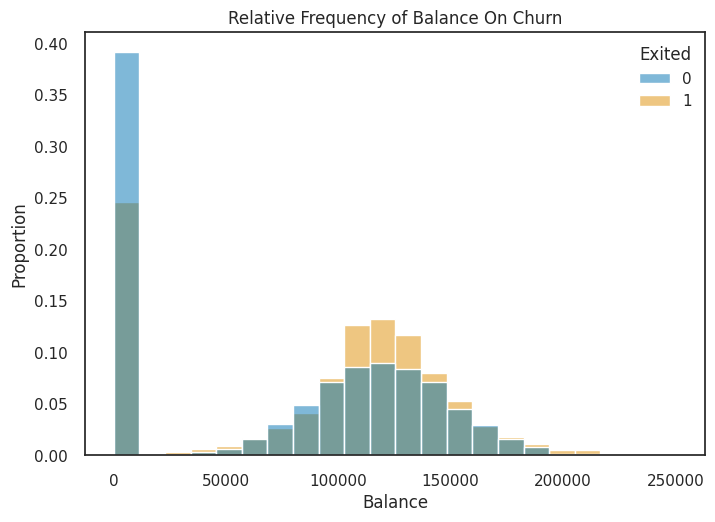

In [39]:
sns.histplot(data=data, x= 'Balance', hue= 'Exited', multiple='layer', stat='proportion', discrete=None, \
            palette='colorblind', common_norm=False)
plt.title('Relative Frequency of Balance On Churn')
plt.show()

In [40]:
exited_0 = data[data['Exited'] == 0]['Balance']
exited_1 = data[data['Exited'] == 1]['Balance']
stat, p_value = stats.mannwhitneyu(exited_0, exited_1)
print(f'Mann-Whitney U Statistic including zero balance: {stat:.3f}, p-value: {p_value:.3f}')


exited_0 = data[(data['Exited'] == 0) & (data['Balance'] != 0)]['Balance']
exited_1 = data[(data['Exited'] == 1) & (data['Balance'] != 0)]['Balance']
stat, p_value = stats.mannwhitneyu(exited_0, exited_1)
print(f'\nMann-Whitney U Statistic on non-zero balance: {stat:.3f}, p-value: {p_value:.3f}')

Mann-Whitney U Statistic including zero balance: 6852646.500, p-value: 0.000

Mann-Whitney U Statistic on non-zero balance: 3650896.500, p-value: 0.234


## Linking Features to Churn Summary

Our initial screening, based on separation by churn status, has identified a robust set of statistically significant predictors of customer attrition. These key drivers include the demographic variables Age and Gender, the behavioral indicators Number of Products, Activeness Status, and whether a Complaint was filed, along with the Geographical location.<br>
Crucially, our feature engineering effort established that the HasZeroBalance binary variable is analytically superior to the raw, continuous Balance variable. The binary feature will be retained due to its clarity and greater predictive efficacy.

Path Forward: Multivariate Analysis<br>
The next phase of this study will transition to multivariate analysis. We will focus on exploring the complex relationships among these identified predictor variables. Specifically, we will systematically investigate potential interaction effects, test for mediation (where one variable's effect is explained by a second), and identify any confounding variables that may distort the true relationships between our key predictors and customer churn. This step is essential for building a final predictive model that is both accurate and rigorously interpreted.

<a id="2.3"></a>
<h2 style="background-color:orange;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">2.3 Multivariate Analysis</h2>

## Product Engagement Effects on Zero Balance and Churn

The analysis confirms a statistically significant interaction effect involving the zero balance status. The effect of a Zero Balance on churn is not uniform; it changes significantly depending on the number of products a customer holds. 
<br>
**Recomendation:** We must include the explicit interaction term ($\text{HasZeroBalance} \times \text{Number of Products}$) in the model to accurately capture how these two factors combine to influence churn.

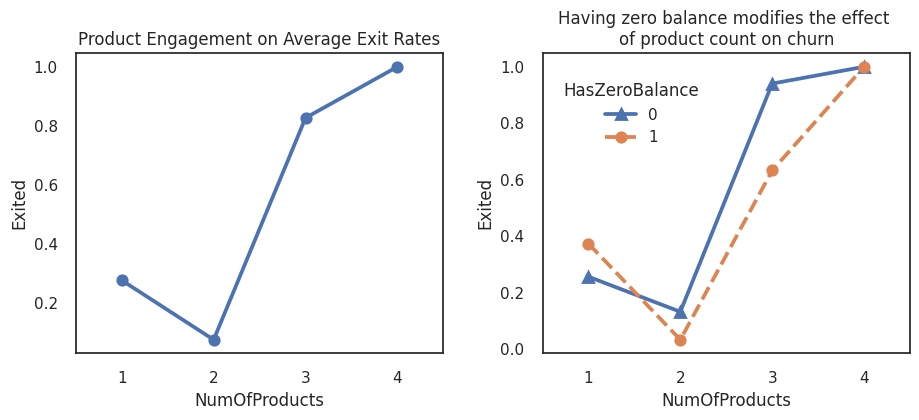

In [41]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
sns.pointplot(data=data, x='NumOfProducts', y='Exited', errorbar=None, ax=axes[0])

axes[0].set_title("Product Engagement on Average Exit Rates")
axes[0].invert_yaxis()


sns.pointplot(data=data, x='NumOfProducts', y='Exited', hue='HasZeroBalance', \
                markers=["^", "o","D"], linestyles=["-", "--","-."], errorbar=None, ax=axes[1])

axes[1].set_title("Having zero balance modifies the effect \nof product count on churn")
axes[1].invert_yaxis()
sns.move_legend(axes[1], "upper left", bbox_to_anchor=(0.02, 0.95))

fig.tight_layout(pad=3.0, w_pad=2.0, h_pad=2.0)

plt.show()

In [42]:
log_lin_3_way_cat_association(data_df= data, exposure_txt= 'HasZeroBalance', outcome_txt= 'Exited', \
                              stratum_txt= 'NumOfProducts', alpha=0.05, verbose=False)

CMH equivalent test (Conditional Independence) Statistic: 8.0775, p-value: 0.004

Breslow-Day equivalent test (Homogeneity) Statistic: 240.5787, p-value: 0.000


In [43]:
pairwise_loglin_simple_heterogenous_posthoc(df= data, exposure_var= 'HasZeroBalance', \
                                                        outcome_var= 'Exited', stratum_var= 'NumOfProducts', \
                                                        p_adjust_method='fdr_bh')

,Stratum,comparison,p_value_raw,corrected_p_value,significant
0,1,1 vs 0,0.00,0.00,True
1,3,1 vs 0,0.00,0.00,True
2,2,1 vs 0,0.00,0.00,True
3,4,1 vs 0 (Insufficient Data),1.00,1.00,False


## Customer Active Status on Age and Churn

We analyzed the relationship between Age, Churn (Exited), and Active Status (IsActiveMember) to refine the predictive models. We confirmed that both Age and Active Status are individually significant predictors of Churn. I used a robust, nonparametric Aligned Rank Transform ($\text{ART}$) $\text{ANOVA}$ (with Age as the dependent variable) to test the complex relationship between the two categorical predictors. The $\text{Churn} \times \text{IsActiveMember}$ interaction effect on the Age distribution was highly significant. This means that the combined influence of being active/inactive and having churned/not churned results in dramatically different age profiles. Post-hoc testing revealed that differences in average age distributions exist across almost all combinations of Churn and Active Status. The only exception was the comparison between inactive members who churned ($\text{Exit}=1, \text{IsActive}=0$) and active members who churned ($\text{Exit}=1, \text{IsActive}=1$). Their age distributions were statistically similar. This complex pattern confirms that *Active Status* doesn't just predict churn; it moderates how *Age* is linked to churn risk.<br>
**Recommendation:** Immediately add an interaction variable ($\text{Age} \times \text{IsActiveMember}$) to predictive churn models. This step is essential to capture the full moderating effect and prevent misestimating the churn risk associated with age for different member segments.

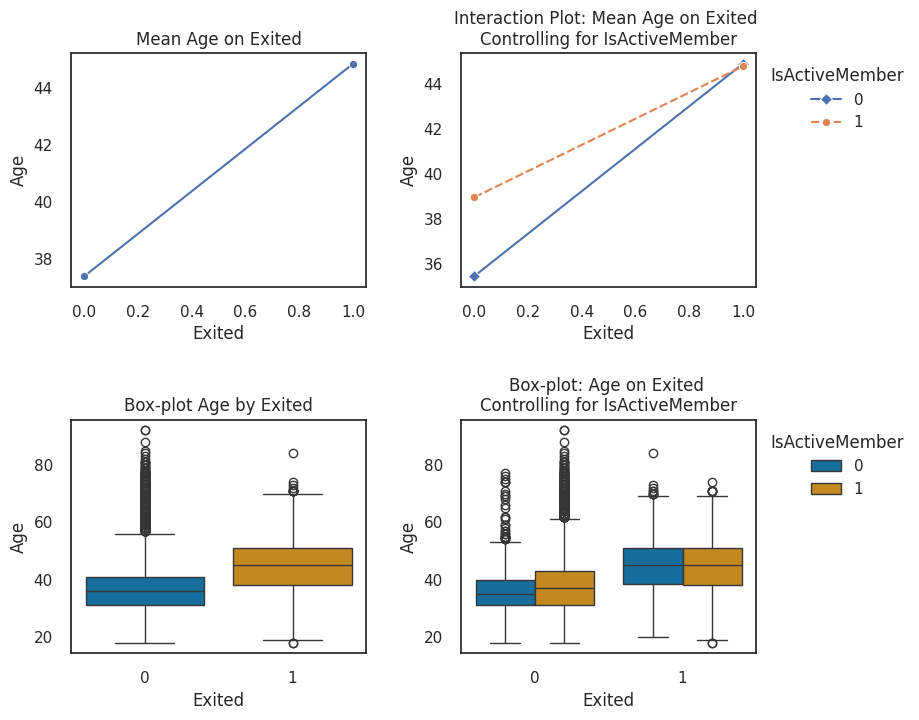

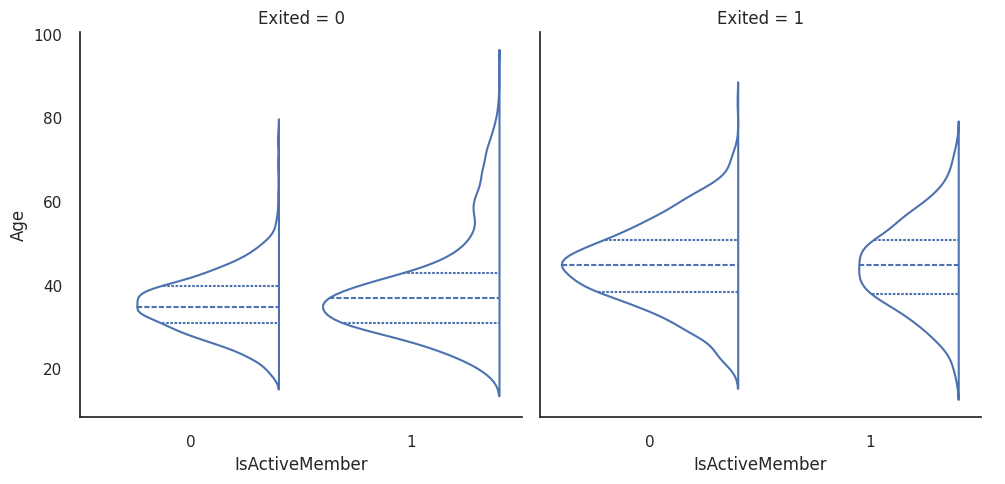

In [44]:
three_way_cat_cont_interactions(data_df = data, y_var = 'Age', exposure= 'Exited', control= 'IsActiveMember')

sns.catplot(data=data, x='IsActiveMember', col="Exited", y='Age', split=True, kind='violin', \
            fill=False, inner='quart', density_norm='count')
plt.show()

In [45]:
active_0 = data[data['IsActiveMember'] == 0]['Age']
active_1 = data[data['IsActiveMember'] == 1]['Age']
stat, p_value = stats.mannwhitneyu(active_0, active_1)
print(f'Mann-Whitney U Statistic between Age and IsActiveMember: {stat:.3f}, p-value: {p_value:.3f}')

print(50*'-','\n')

print('Aligned Rank Transformation Omnibus Test on for Effects of Exit and IsActiveMember on Age:\n')
print(alighed_rank_transform_anova(data, 'Age', ['Exited', 'IsActiveMember']))

print(50*'-','\n')

print('Aligned Rank Transformation Contrast Post-Hoc Test for Interaction (Exit:IsActiveMember):\n')
print(art_contrast_posthoc_unified(data, dependent_var= 'Age', factors= ['Exited', 'IsActiveMember'], \
                             effect_to_test = 'Exited:IsActiveMember', p_adjust='holm'))

Mann-Whitney U Statistic between Age and IsActiveMember: 11914173.000, p-value: 0.000
-------------------------------------------------- 

Aligned Rank Transformation Omnibus Test on for Effects of Exit and IsActiveMember on Age:

                                          sum_sq   df      F  PR(>F)
Main effect: Exited                4218716618.88 1.00 568.87    0.00
Main effect: IsActiveMember          13257084.85 1.00   1.59    0.21
Interaction: Exited:IsActiveMember  193203740.46 1.00  23.29    0.00
-------------------------------------------------- 

Aligned Rank Transformation Contrast Post-Hoc Test for Interaction (Exit:IsActiveMember):

     0:0  0:1  1:0  1:1
0:0 1.00 0.00 0.00 0.00
0:1 0.00 1.00 0.00 0.00
1:0 0.00 0.00 1.00 0.65
1:1 0.00 0.00 0.65 1.00


In [46]:
# Verification of results using stratafied logistic regression testing:
strat_logistic_test=stratified_logistic_regression_with_posthoc(data_df= data, exposure_cont_txt= 'Age', \
                                            outcome_bin_txt= 'Exited', stratum_cat_txt= 'IsActiveMember', \
                                                alpha=0.05, verbose=False)


print(f'\nConditional independence between age and active status on exited statistic: ',
      f"{strat_logistic_test['conditional_stat']:.3f}, p-value: {strat_logistic_test['conditional_pvalue']:.3f} \n")
print('\n',50*'-')
print(f'\nHomogeneity Test between age and active status on exited statistic: ',
      f"{strat_logistic_test['homogeneity_stat']:.3f}, p-value: {strat_logistic_test['homogeneity_pvalue']:.3f} \n")


Conditional independence between age and active status on exited statistic:  911.889, p-value: 0.000 


 --------------------------------------------------

Homogeneity Test between age and active status on exited statistic:  340.270, p-value: 0.000 



## Product Engagement and Age on Churn

The data reveals a clear relationship between average customer age and the number of products they hold, particularly concerning churn risk. Customers with only one product are, on average, the oldest across both the churned and non-churned groups. A notable interaction exists between age and product count: two-product customers who churned were older than those with three products who churned. Statistical analysis (ART ANOVA) confirmed the significant interaction between age and the number of products customer holds when Exited=1.<br>
**Recomendation:** Include the Age $\times$ Number of Products interaction term in all predictive churn models to improve accuracy and targeting.

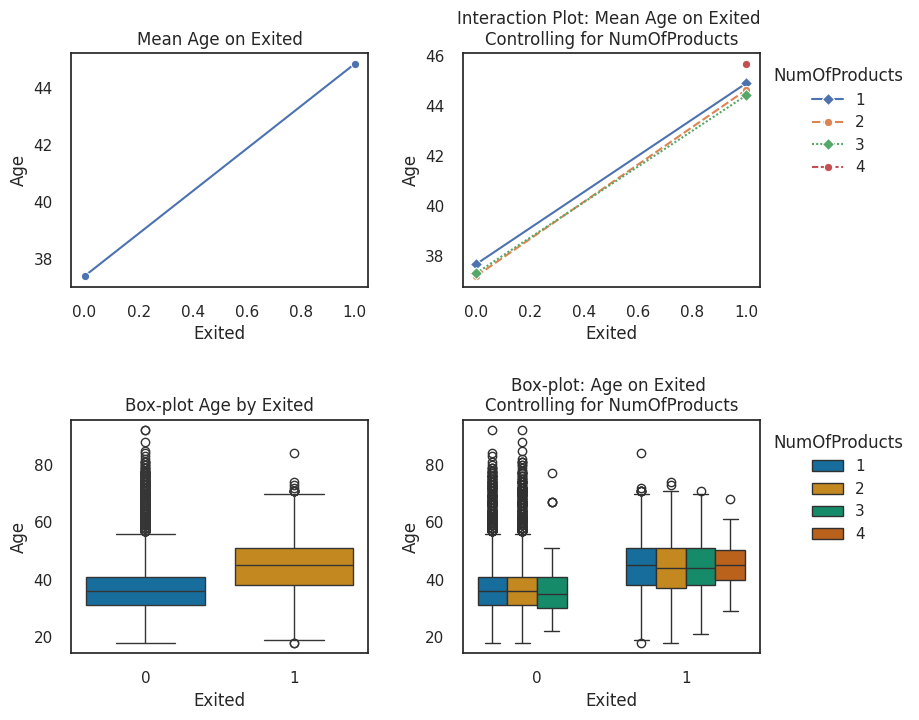

In [47]:
three_way_cat_cont_interactions(data_df = data, y_var = 'Age', \
                                exposure= 'Exited', control= 'NumOfProducts')

In [48]:
Kruskal_stats, dunn_comparisons = kruskal_wallis_with_dunn(data=data, val_col= 'Age', group_col= 'NumOfProducts', \
                                                           alpha = 0.05, p_adjust_method='bonferroni')

print(f"Kruskal H-Statistic between Age and Number of Products: {Kruskal_stats['H-statistic']:.3f}, \
    p-value: {Kruskal_stats['p-value']:.3f}\n")
print('Dunn\'s test pairwise interaction comparisons for Age grouped by Number of Products:')
print(dunn_comparisons)

print(50*'-','\n')

print('Aligned Rank Transformation Omnibus Test on for Effects of Exit and Number of Products on Age:\n')
print(alighed_rank_transform_anova(data, 'Age', ['Exited', 'NumOfProducts']))

print(50*'-','\n')

print('Aligned Rank Transformation Contrast Post-Hoc Test for Interaction (Exit:NumOfProducts):\n')
print(art_contrast_posthoc_unified(data, dependent_var= 'Age', \
                                   factors= ['Exited', 'NumOfProducts'], effect_to_test = 'Exited:NumOfProducts', \
                                   p_adjust='holm'))

Kruskal H-Statistic between Age and Number of Products: 189.777,     p-value: 0.000

Dunn's test pairwise interaction comparisons for Age grouped by Number of Products:
     1    2    3    4
1 1.00 0.00 0.00 0.00
2 0.00 1.00 0.00 0.00
3 0.00 0.00 1.00 0.25
4 0.00 0.00 0.25 1.00
-------------------------------------------------- 

Aligned Rank Transformation Omnibus Test on for Effects of Exit and Number of Products on Age:

                                         sum_sq   df      F  PR(>F)
Main effect: Exited               5736627826.87 1.00 768.74    0.00
Main effect: NumOfProducts        1048307984.03 3.00  43.00    0.00
Interaction: Exited:NumOfProducts  175801943.35 3.00   7.12    0.00
-------------------------------------------------- 

Aligned Rank Transformation Contrast Post-Hoc Test for Interaction (Exit:NumOfProducts):

     0:1  0:2  0:3  1:1  1:2  1:3  1:4
0:1 1.00 0.78 1.00 0.00 0.00 0.00 0.00
0:2 0.78 1.00 1.00 0.00 0.00 0.00 0.00
0:3 1.00 1.00 1.00 0.00 0.00 0.00 0.00
1

## Data Anomalies

### Satisfaction Scores Well Distributed Among Complaining Customers

The bulk of customer churn originated from the population of customers who lodged a complaint. Analysis of complaint resolution satisfaction scores shows no significant difference between complaining and non-complaining groups. Expected concentration of low scores (1-3) among complainants was not observed. The <u>*complaint satisfaction scoring system is ineffective*</u> at providing actionable insight into churn propensity. It requires review and redesign to establish a reliable metric for identifying high-risk customers.

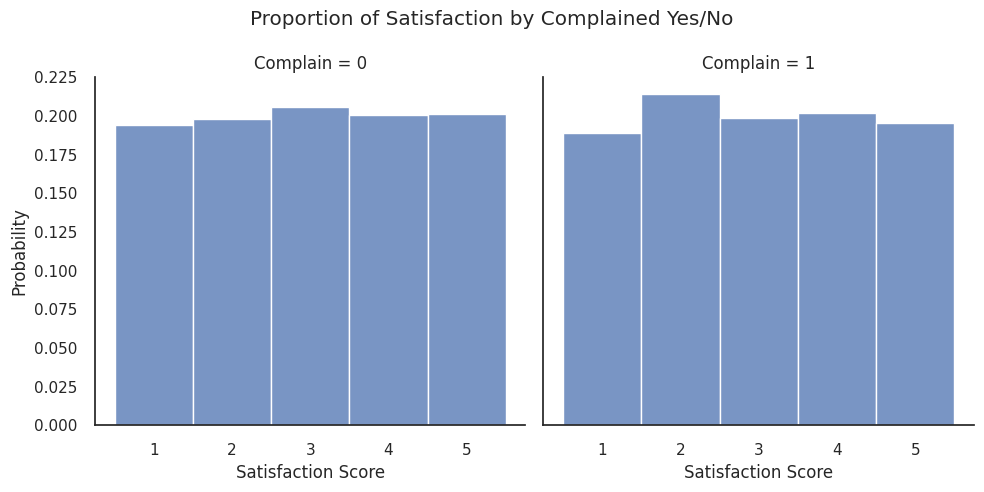

In [49]:
g= sns.displot(data=data, x='Satisfaction Score', col='Complain', kind='hist', stat='probability', common_norm=False)
g.fig.suptitle('Proportion of Satisfaction by Complained Yes/No')
plt.tight_layout()
plt.show()

In [50]:
contingency_table = pd.crosstab(data['Complain'], data['Satisfaction Score'])
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
print(f'Chi-Square Statistic: {chi2:.3f}, p-value: {p_value:.3f}')

Chi-Square Statistic: 3.011, p-value: 0.556


### Credit Card Points Earned for Non-Credit Card Owners

The "*Points Earned*" variable is misleading. Despite documentation linking points exclusively to credit card usage, all customers—including non-cardholders—have points, and the point spread is statistically identical across all key customer segments (card ownership, card type, tenure, active status). One must immediately verify the data source and correct the variable definition, as the current data does not reflect expected disparities based on loyalty or premium card usage, making it useless for segmentation of churn.

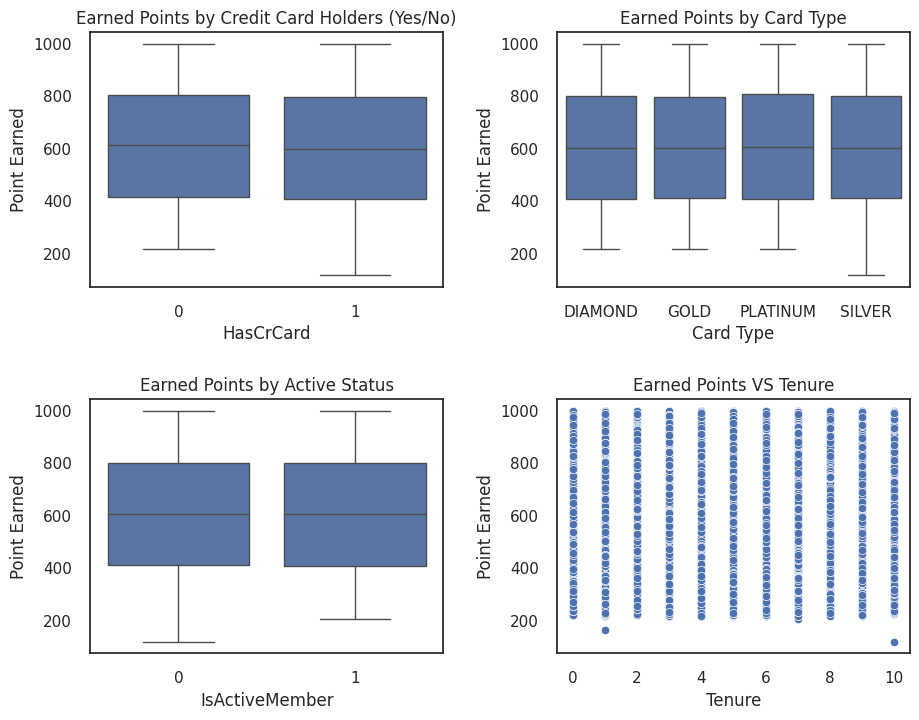

In [51]:
fig, axes= plt.subplots(2, 2, figsize=(10,8))
sns.boxplot(data=data, x='HasCrCard', y='Point Earned', ax=axes[0,0])
axes[0,0].set_title('Earned Points by Credit Card Holders (Yes/No)')

sns.boxplot(data=data, x='Card Type', y='Point Earned', ax=axes[0,1])
axes[0,1].set_title('Earned Points by Card Type')

sns.boxplot(data=data, x='IsActiveMember', y='Point Earned', ax=axes[1,0])
axes[1,0].set_title('Earned Points by Active Status')

sns.scatterplot(data=data, x='Tenure', y='Point Earned', ax=axes[1,1])
axes[1,1].set_title('Earned Points VS Tenure')

plt.tight_layout(pad= 3.0, w_pad=2.0, h_pad= 2.0)
plt.show()

## Multivariate Analysis Conclusion

We are optimizing the churn prediction model by introducing three new interaction variables:
1. Products $\times$ Zero Balance
2. Active Member $\times$ Age
3. Products $\times$ Age

To maintain focus and efficiency, we are dropping six non-predictive variables (Credit Score, Estimated Salary, Tenure, Has Credit Card, Points Earned, and Satisfaction Score) from the prediction model. While these variables don't predict churn, they are valuable for future effect analysis on prevention strategies.

<a id="3.0"></a>
<h1 style="background-color:orange;font-family:newtimeroman;font-size:300%;text-align:center;border-radius: 15px 50px;">3 Data Preprocessing and Cleaning</h1>

Our next critical step is to consolidate and prepare the final dataset before building our predictive model. We will follow a standard, multi-stage pipeline to ensure the resulting model is both highly accurate and robust across all customer types.

We will begin by splitting our data into training and testing sets. Due to the strategic importance of customer feedback, we are taking an extra step to stratify this split, ensuring both our training and final testing environments contain a representative sample of all key customer segments: those who complain and those who churn. This prevents bias and ensures a reliable final test. We will use cross-validation (multiple tests) instead of a single validation set to further guarantee the model's consistent performance.

Based on our analysis, we are using seven key variables (Age, Geography, Gender, Active Member status, Complaint status, Zero Balance status, and Number of Products) to predict customer churn (Exited).

**The Data Preparation Pipeline:**

We will execute a three-phase preparation process:

1. Standardization and Outlier Cleanup: <br>
We will clean up extreme outliers and ensure all numerical data is on the same scale, which is essential for the model to fairly weigh the impact of each factor (e.g., Age versus Number of Products).

2. Risk Balancing & New Insight Creation:<br>
    - To combat the issue of our model only seeing a small percentage of customers who actually churn, we are using an advanced technique (SMOTENC) to rebalance the dataset. This ensures the model is highly effective at identifying the small but critical population of high-risk customers.

    - We will create new high-impact interaction terms (e.g., the combined risk of 'Number of Products' and 'Zero Balance') that proved powerful in our initial analysis.

3. Final Modeling Feed:<br>
We will complete the data encoding and feed the highly prepared, balanced dataset into the classification algorithm to begin model building in the next section.

These steps ensure we deliver a model that provides actionable, reliable predictions for the business.

Specific Pipeline Steps:
1. Winsorize
2. Transform
3. Scale
4. SMOTENC
5. One-hot-encoding
6. Create interaction terms
7. Classifier

In [52]:
# stratify based on exited and complained
data['stratify_col']= data['Exited'].astype(str) + '_' + data['Complain'].astype(str)
stratify_data= data['stratify_col']
data.drop(columns=['stratify_col'], inplace=True)

X = data.drop(columns=['Exited'])
y = data['Exited']

# Option to drop variables if needed
drop_cols = []
X.drop(columns=drop_cols, inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify= stratify_data)

numeric_log_scale_cols= ['Age']
numeric_log_scale_cols = [item for item in numeric_log_scale_cols if item not in drop_cols]
numeric_scale_cols=[]
numeric_scale_cols = [item for item in numeric_scale_cols if item not in drop_cols]
onehot_transform_cols= ['Geography', 'Gender', 'IsActiveMember', 'Complain', 'HasZeroBalance', 'NumOfProducts']
onehot_transform_cols = [item for item in onehot_transform_cols if item not in drop_cols]

# Handle outliers with Winsorizor:
winsorizer= Winsorizer(capping_method='iqr', tail='both', fold=1.5, \
                       variables= numeric_scale_cols + numeric_log_scale_cols)

# Log transform for right-skewed Age (from univariate insight: skew 1.01)
# Log1p transform for zero-inflated Balance (from univariate insight: slight left skew -0.14)
# Then scale
num_log1p_scale_transformer = imbPipeline(steps=[
    ('Log_1', FunctionTransformer(np.log1p, validate=True, feature_names_out='one-to-one')),
    ('scaler', StandardScaler())
])


# Scale remaining numeric variables
num_scale_transformer = imbPipeline(steps=[
    ('scaler', StandardScaler())
])



scaling_pipeline= ColumnTransformer(transformers= [
    ('log_scale', num_log1p_scale_transformer, numeric_log_scale_cols),
    ('scale_only', num_scale_transformer, numeric_scale_cols),
    ('categorical', 'passthrough', onehot_transform_cols)
], remainder= 'drop', verbose_feature_names_out=False
)



# Adding SMOTENC and OneHot encoding to pipeline:
# 1. Determine the indices of the categorical columns *after* preprocessing.
# # The ColumnTransformer output order is (LOG_SCALE_COLS + OTHER_NUMERIC_COLS + CATEGORICAL_COLS)
# # Number of numeric columns = len(LOG_SCALE_COLS) + len(OTHER_NUMERIC_COLS) = len(NUMERIC_ALL)
# num_numeric_features = len(numeric_scale_cols + numeric_log_scale_cols) 
# categorical_indices = list(range(num_numeric_features, num_numeric_features + len(ordinal_cols+onehot_transform_cols)))

# # adding one to numerical columns to avoid onehot encoding ordinal variable Satisfaction Score
# one_hot_categorical_indices = list(range(num_numeric_features + len(ordinal_cols), \
#                                          num_numeric_features + len(ordinal_cols+onehot_transform_cols)))

# 2. Define the SMOTENC sampler.
# It uses the categorical_features indices from the data *after* the preprocessing (ColumnTransformer) step.
smotenc_sampler = SMOTENC(
    categorical_features=onehot_transform_cols,
    random_state=42)


# 3. Define the final OneHotEncoder for the Categorical features 
# (which are still in their original format after SMOTENC).
# SMOTENC is designed to handle the encoding internally during sampling, but
# for feature importance in the *final* model, you usually want one-hot encoding 
# *after* SMOTENC but *before* the classifier.



#ordinal_indices= list(range(num_numeric_features,num_numeric_features + len(ordinal_cols)))

final_ohe_transformer = ColumnTransformer(
    transformers=[
        # Pass through the numeric columns (which are now the first 'num_numeric_features' columns plus 1 
        #for ordinal variable)
        ('passthrough_num', 'passthrough', (numeric_log_scale_cols + numeric_scale_cols)),
        # Apply OneHotEncoder only to the categorical columns
        ('final_ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False), \
         onehot_transform_cols),
    ],
    remainder= 'drop',
    verbose_feature_names_out=False
)



# Custom function for function transformer to add interactions
def create_custom_interactions(X):
    # Make a copy to avoid changing the original data
    X_out = X.copy()
    
    # Add interaction columns for NumOfProducts X HasZeroBalance
    # Check if columns exist (in case handle_unknown='ignore' drops them)
    if 'NumOfProducts_1' in X_out.columns and 'HasZeroBalance_1' in X_out.columns:
        X_out['NumOfProd1_X_ZeroBal'] = X_out['NumOfProducts_1'] * X_out['HasZeroBalance_1']

    if 'NumOfProducts_2' in X_out.columns and 'HasZeroBalance_1' in X_out.columns:
        X_out['NumOfProd2_X_ZeroBal'] = X_out['NumOfProducts_2'] * X_out['HasZeroBalance_1']

    if 'NumOfProducts_3' in X_out.columns and 'HasZeroBalance_1' in X_out.columns:
        X_out['NumOfProd3_X_ZeroBal'] = X_out['NumOfProducts_3'] * X_out['HasZeroBalance_1']

    if 'NumOfProducts_4' in X_out.columns and 'HasZeroBalance_1' in X_out.columns:
        X_out['NumOfProd4_X_ZeroBal'] = X_out['NumOfProducts_4'] * X_out['HasZeroBalance_1']
        
    # Add interaction columns for IsActiveMember X Age
    if 'Age' in X_out.columns and 'IsActiveMember_1' in X_out.columns:
        X_out['IsActive_X_Age'] = X_out['Age'] * X_out['IsActiveMember_1']

    # Add interaction columns for NumOfProducts X Age
    if 'NumOfProducts_1' in X_out.columns and 'Age' in X_out.columns:
        X_out['NumOfProd1_X_Age'] = X_out['NumOfProducts_1'] * X_out['Age']

    if 'NumOfProducts_2' in X_out.columns and 'Age' in X_out.columns:
        X_out['NumOfProd2_X_Age'] = X_out['NumOfProducts_2'] * X_out['Age']

    if 'NumOfProducts_3' in X_out.columns and 'Age' in X_out.columns:
        X_out['NumOfProd3_X_Age'] = X_out['NumOfProducts_3'] * X_out['Age']

    if 'NumOfProducts_4' in X_out.columns and 'Age' in X_out.columns:
        X_out['NumOfProd4_X_Age'] = X_out['NumOfProducts_4'] * X_out['Age']
    
    return X_out


interaction_creator = FunctionTransformer(create_custom_interactions)



# 4. Construct the full imblearn Pipeline.
full_pipeline = imbPipeline(steps=[
    # Step 1: Winsorization (applies to ALL numeric cols)
    ('winsorize', winsorizer),
    # Step 2: Preprocessor (Log/Scaling/Categorical Passthrough)
    ('scaling', scaling_pipeline),
    # Step 3: SMOTENC (Resampling step, must be an imblearn sampler)
    ('smotenc', smotenc_sampler),
    # Step 4: Final One-Hot Encoding and feature alignment
    ('final_ohe', final_ohe_transformer),
    # Step 5: Add interaction terms
    ('custom_interactions', interaction_creator),
    # Step 6: Final Estimator (e.g., LogisticRegression, RandomForestClassifier) 
    ('classifier',LogisticRegression(random_state=42))
]).set_output(transform='pandas')


In [53]:
# Create dataframe with or without smotenc
def transformed_training_data(pipeline_func, target_col, X_train, y_train=None, remove_smotenc=False, show_shape=False):
    pipeline_clone= clone(pipeline_func)
    #setup Df
    if remove_smotenc==True:
        X = pd.DataFrame(pipeline_clone.set_params(smotenc=None).fit_transform(X_train,y_train))
        y = pd.DataFrame(y_train, columns=target_col)

    else:
        X_temp, y =pipeline_clone.named_steps['smotenc'].fit_resample(pipeline_clone[:2].\
                                                                      fit_transform(X_train, y_train),y_train)
        X = pipeline_clone.fit_transform(X_train, y_train)
        y = pd.DataFrame(y, columns=target_col)
        del X_temp

    # print shape of df
    if show_shape==True:
        print(f"X_Shape: {X.shape}")
        print(f"y_Shape: {y.shape}")
    return [X,y]


# Custom correlation plot to check effects of smotenc and non-smote
def corr_plot_balancing_cust(pipeline_func, target_col, X_train, y_train=None, remove_smotenc=False, show_shape=False):
    pipeline_clone= clone(pipeline_func)
    sns.set_theme(style="white")

    #setup Df
    if remove_smotenc==True:
        df= pd.concat(transformed_training_data(pipeline_func= pipeline_clone.set_params(smotenc=None), \
                                                target_col= target_col, X_train=X_train, y_train= y_train, \
                                                remove_smotenc=remove_smotenc, show_shape=show_shape), axis=1)
    else:
        df= pd.concat(transformed_training_data(pipeline_func= pipeline_clone, target_col= target_col, X_train=X_train, \
                                                y_train= y_train, remove_smotenc=remove_smotenc, \
                                                show_shape=show_shape), axis=1)
    
    # Compute the correlation matrix
    corr = df.corr()
    
    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))
    
    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(15, 12))
    
    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(230, 20, as_cmap=True)
    
    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=0.1, vmin=-0.1, center=0,
                square=True, linewidths=.5, annot=True, annot_kws={"fontsize":10}, fmt=".3f", cbar_kws={"shrink": .5})

    plt.show()
    return

Let's take a look at what are correlation structure looks like now with our training set before and after SMOTENC

-----------Standard correlation plot of transformed data-------------
X_Shape: (8000, 17)
y_Shape: (8000, 1)


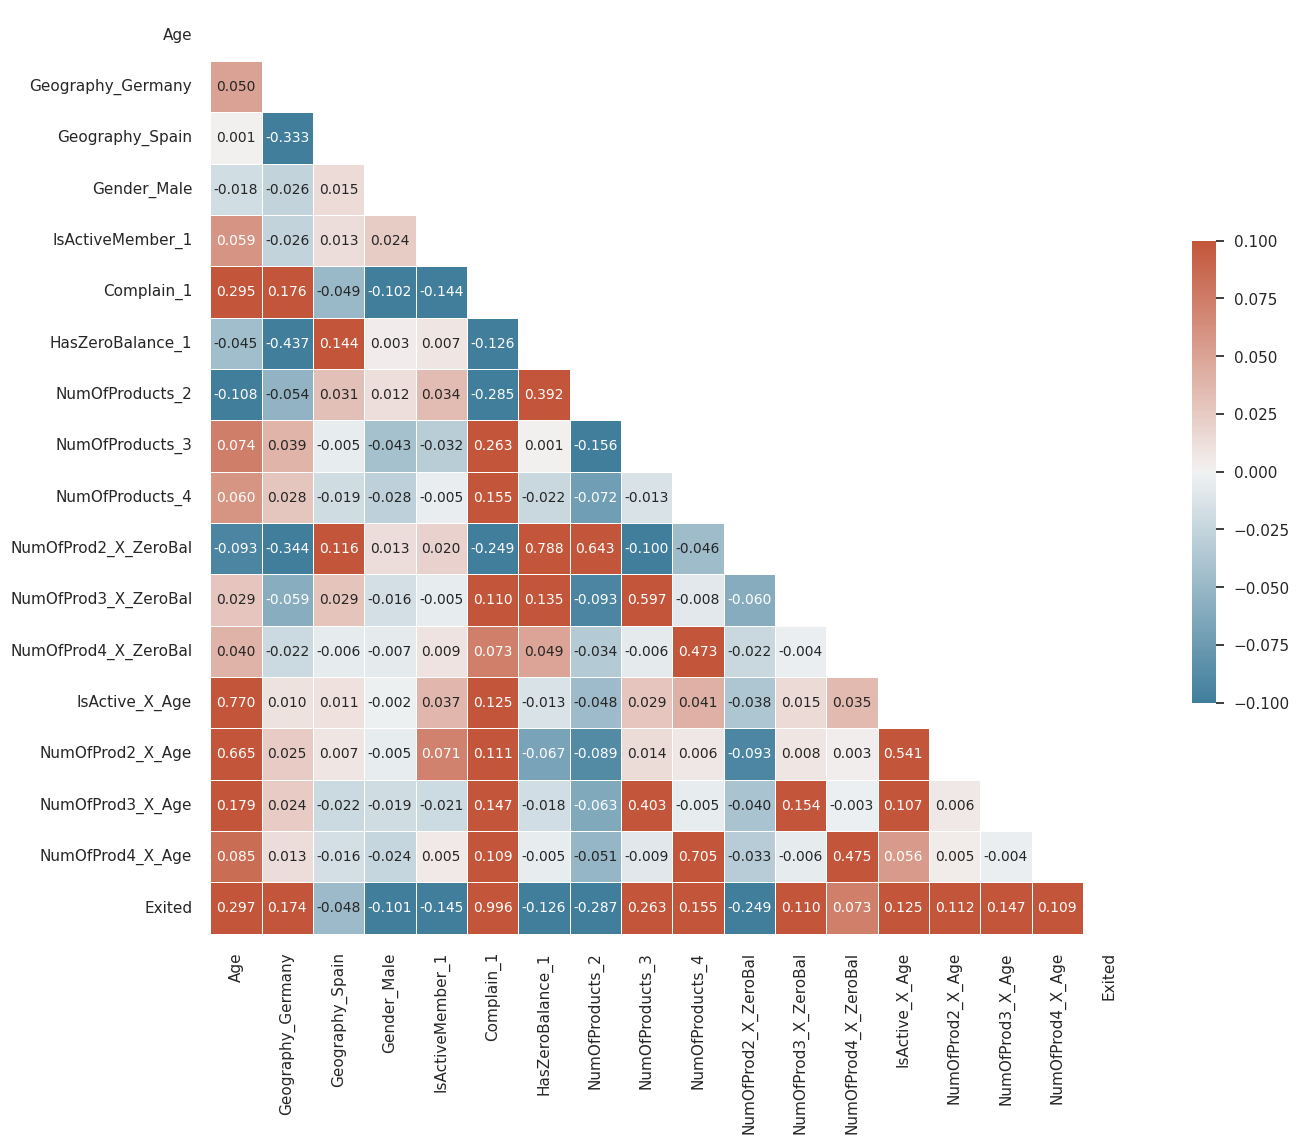

-----------Smotenc correlation plot of transformed data-------------
X_Shape: (12740, 17)
y_Shape: (12740, 1)


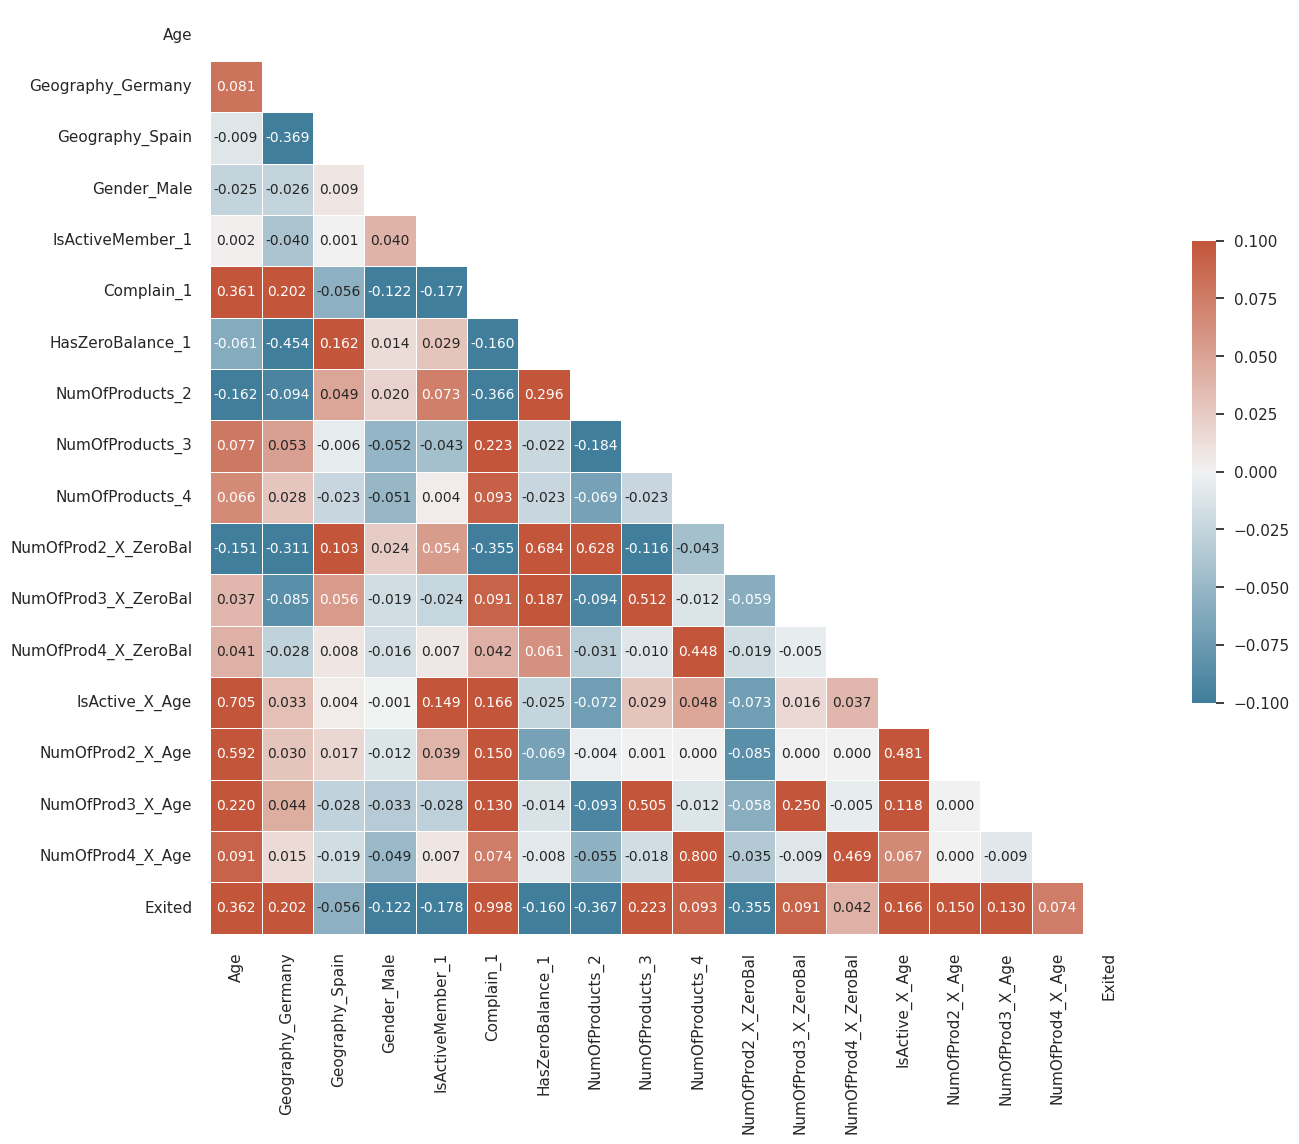

In [54]:
print('-----------Standard correlation plot of transformed data-------------')
corr_plot_balancing_cust(pipeline_func= full_pipeline[:-1], target_col=['Exited'], X_train= X_train, \
                         y_train= y_train, remove_smotenc=True, show_shape=True)

print('-----------Smotenc correlation plot of transformed data-------------')
corr_plot_balancing_cust(pipeline_func= full_pipeline[:-1], target_col=['Exited'], X_train= X_train, \
                         y_train= y_train, remove_smotenc=False, show_shape=True)

<a id="4.0"></a>
<h1 style="background-color:orange;font-family:newtimeroman;font-size:300%;text-align:center;border-radius: 15px 50px;">4 Model Implementation</h1>

We conducted a comprehensive review of several advanced modeling techniques—including complex methods like Random Forest and XG Boost—to develop the most reliable and efficient predictor of customer churn.

**Core Findings & Model Selection**<br>
1. Exceptional Performance: After rigorous testing and tuning, all five candidate models delivered similar, excellent performance, achieving a high prediction accuracy of 99% on new, unseen customer data.

2. Simplicity Wins: Given the near-identical high performance across the board, we selected the simplest, most streamlined model: Logistic Regression. This choice minimizes implementation cost, maximizes speed, and makes the model easy to explain and maintain without sacrificing predictive power.

3. The Key Driver: Our core finding is that the final model relies almost exclusively on one critical variable: whether or not a customer registers a formal complaint.

**Strategic Gaps and Future Focus**<br>
While 99% accuracy is an outstanding statistical result, focusing on the single "Complain" variable reveals two important strategic gaps that we are currently addressing:

- Silent Churners (Missed Opportunities): The current model cannot effectively predict customers who leave without ever complaining (customers who "ghost" us). These represent silent attrition that we need new signals to catch.

- False Alarms (Wasted Resources): The model also struggles with customers who complain but ultimately decide to stay. If we focus intervention on every complaint, we risk over-allocating resources to customers who were never truly at risk of leaving.

In short: our model successfully confirmed that a complaint is a very strong signal for impending churn, but it doesn't solve the problem of unannounced churn.<br>
<br>
**Strategic Value and Next Steps**<br>
The model successfully answers the core problem: providing a reliable predictor of customer exit behavior based on a simple, actionable signal.

Our deep-dive analysis also revealed valuable strategic insights for the business:

- Data Quality: We identified potential holes in our data collection that, if addressed, could unlock even stronger predictive drivers.

- Product Strategy: The analysis hints at underlying issues related to product tiering or pricing structures that may be driving the complaint/churn cycle.<br>
<br>
Our next future action is to build an alternative predictive model that deliberately omits the "Complain" variable to uncover these other, less obvious drivers of churn and provide a more diverse set of early warning signals.

In [55]:
# Defining multiple models and their parameter grids for tuning using gridsearchcv
models = {
    'LogisticRegression': LogisticRegression(random_state=42),
    'SVC': SVC(random_state=42,kernel='rbf'),
    'RandomForest': RandomForestClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42,learning_rate=0.7),
    'XGBoost': XGBClassifier(random_state=42,eval_metric='logloss')
}

param_grids = {
    'LogisticRegression': {'classifier__C': [0.0001, 0.0004],
                           'classifier__penalty': ['l1'],
                           'classifier__solver': ['liblinear'],
                          'classifier__max_iter': [50]
                          },
    'SVC': {'classifier__C': [0.1, 0.25],
            'classifier__max_iter': [100, 150]
           },
    'RandomForest': {'classifier__n_estimators': [50, 100],
                     'classifier__max_features': ['sqrt', None],
                     'classifier__max_depth': [None, 2],
                    'classifier__min_samples_split': [4,5]
                    },
    'AdaBoost': {'classifier__learning_rate': [0.03],
                 'classifier__n_estimators': [50]
                },
    'XGBoost': {'classifier__learning_rate': [0.03],
                'classifier__max_depth': [2, None],
                'classifier__n_estimators': [50],
                'classifier__lambda': [50],
                'classifier__alpha': [50],
                'classifier__subsample': [1.0],
                'classifier__colsample_bytree': [0.3],
                'classifier__min_child_weight': [5]
               }
}



scorers = ['accuracy', 'precision', 'recall', 'f1']


# 5. Loop through models, create full pipelines, and perform GridSearchCV
results = {}
cv_results= {}
for model_name, model_estimator in models.items():
    # Get the parameter grid for the current model
    current_param_grid = param_grids[model_name]

    # Perform GridSearchCV
    stratified_kfold= StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    grid_search = GridSearchCV(full_pipeline.set_params(classifier=model_estimator), 
                               current_param_grid, cv= stratified_kfold, scoring=scorers, 
                               refit='accuracy', n_jobs=-1, verbose=0)
    grid_search.fit(X_train, y_train)

    results[model_name] = {
        'best_score': grid_search.best_score_,
        'best_params': grid_search.best_params_,
        'best_estimator': grid_search.best_estimator_
    }

    cv_results[model_name]= {
        'cv_results': grid_search.cv_results_
    }

    print(f"Model: {model_name}")
    print(f"Best Score: {results[model_name]['best_score']:.8f}")
    print(f"Best Parameters: {results[model_name]['best_params']}")
    print("-" * 30)

# Example of using the best estimator from one of the models
# best_lr_model = results['LogisticRegression']['best_estimator']
# print(f"Logistic Regression Test Accuracy: {best_lr_model.score(X_test, y_test):.4f}")

Model: LogisticRegression
Best Score: 0.99862500
Best Parameters: {'classifier__C': 0.0004, 'classifier__max_iter': 50, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}
------------------------------
Model: SVC
Best Score: 0.99862500
Best Parameters: {'classifier__C': 0.1, 'classifier__max_iter': 100}
------------------------------
Model: RandomForest
Best Score: 0.99862500
Best Parameters: {'classifier__max_depth': None, 'classifier__max_features': 'sqrt', 'classifier__min_samples_split': 4, 'classifier__n_estimators': 100}
------------------------------
Model: AdaBoost
Best Score: 0.99862500
Best Parameters: {'classifier__learning_rate': 0.03, 'classifier__n_estimators': 50}
------------------------------
Model: XGBoost
Best Score: 0.99862500
Best Parameters: {'classifier__alpha': 50, 'classifier__colsample_bytree': 0.3, 'classifier__lambda': 50, 'classifier__learning_rate': 0.03, 'classifier__max_depth': 2, 'classifier__min_child_weight': 5, 'classifier__n_estimators'

In [56]:
# Gridsearch results:

#Best overall model
test_models_ls= ['LogisticRegression', 'SVC', 'RandomForest', 'AdaBoost', 'XGBoost']
best_score_ls= []
for model in test_models_ls:
    best_score_ls.append(results[model]['best_score'])

best_model_name = test_models_ls[best_score_ls.index(max(best_score_ls))]

best_lr_model = results[best_model_name]['best_estimator']
print(f"Best model is {best_model_name} with Test Accuracy: {best_lr_model.score(X_test, y_test):.4f}")



# Dataframe with best model metrics
model_names= []
accuracy= []
precision= []
recall= []
F1= []
F1_std= []

for model in test_models_ls:
    model_CV_metrics_df= pd.DataFrame(cv_results[model]['cv_results'])
    best_model_result= model_CV_metrics_df.loc[model_CV_metrics_df['mean_test_f1'].idxmax()]
    best_params_score= best_model_result['mean_test_f1']
    best_params_raw= best_model_result['params']
    model_names.append(model)
    accuracy.append(best_model_result['mean_test_accuracy'])
    precision.append(best_model_result['mean_test_precision'])
    recall.append(best_model_result['mean_test_recall'])
    F1.append(best_model_result['mean_test_f1'])
    F1_std.append(best_model_result['std_test_f1'])


metrics_df= pd.DataFrame({
    'model': model_names,
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1': F1,
    'F1_std': F1_std
})



# Create a dictionary for formatting all float columns to n decimal places
format_dict = {col: "{:.4f}" for col in (metrics_df.select_dtypes(include='float').columns)}
metrics_df = metrics_df.style.format(format_dict)
print('Average CV metrics summary:')
display(metrics_df)



Best model is LogisticRegression with Test Accuracy: 0.9985
Average CV metrics summary:


,model,Accuracy,Precision,Recall,F1,F1_std
0,LogisticRegression,0.9986,0.9951,0.9982,0.9966,0.0018
1,SVC,0.9986,0.9951,0.9982,0.9966,0.0018
2,RandomForest,0.9986,0.9951,0.9982,0.9966,0.0018
3,AdaBoost,0.9986,0.9951,0.9982,0.9966,0.0018
4,XGBoost,0.9986,0.9951,0.9982,0.9966,0.0018


In [57]:
best_pipeline = results[best_model_name]['best_estimator'].fit(X_train,y_train)
final_estimator = best_pipeline.named_steps['classifier'] # 'classifier' is the name given in the pipeline


if hasattr(final_estimator, 'feature_importances_'):
        feature_importances = final_estimator.feature_importances_
        # You can then pair these with your original feature names
        # e.g., feature_names = X_train.columns
        # importances_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})
        # print(importances_df.sort_values(by='importance', ascending=False))
        # Create a DataFrame for better visualization if model has feature importance already
        feature_importance_df = pd.DataFrame({
            'feature': transformed_training_data(pipeline_func= full_pipeline[:-1], target_col=['Exited'], \
                                            X_train= X_train, y_train=y_train, remove_smotenc=False)[0].columns.tolist(),
            'importance': feature_importances
        }).sort_values('importance', ascending=False)
        
        print("\nFeature Importance:")
        display(feature_importance_df.T)
else:
        print("The final estimator in the pipeline does not have 'feature_importances_'.")
        # Create a DataFrame for better visualization of logistic model
        feature_importance_df = pd.DataFrame({
            'feature': transformed_training_data(pipeline_func= full_pipeline[:-1], target_col=['Exited'], \
                                            X_train= X_train, y_train=y_train, remove_smotenc=False)[0].\
                                            columns.tolist() + ["intercept"],
            'importance': np.concatenate([final_estimator.coef_[0], final_estimator.intercept_])
        }).sort_values('importance', ascending=False)

        # Create a dictionary for formatting all float columns to n decimal places
        format_dict = {col: "{:.4f}" for col in (feature_importance_df.select_dtypes(include='float').columns)}
        feature_importance_df = feature_importance_df.style.format(format_dict)
            
        print("\nFeature Coeficients:")
        display(feature_importance_df)



The final estimator in the pipeline does not have 'feature_importances_'.

Feature Coeficients:


,feature,importance
5,Complain_1,0.4330
0,Age,0.0000
10,NumOfProd2_X_ZeroBal,0.0000
16,NumOfProd4_X_Age,0.0000
15,NumOfProd3_X_Age,0.0000
14,NumOfProd2_X_Age,0.0000
13,IsActive_X_Age,0.0000
12,NumOfProd4_X_ZeroBal,0.0000
11,NumOfProd3_X_ZeroBal,0.0000
9,NumOfProducts_4,0.0000


In [58]:
from sklearn.inspection import permutation_importance

full_pipeline.set_params(classifier=models[best_model_name]).fit(X_train, y_train)

# Compute permutation importance on the original data using the best pipeline
result = permutation_importance(
    best_pipeline, X_test, y_test, n_repeats=50, random_state=42, n_jobs=-1, scoring= scorers
)



#my Version
importance_data = {}
# feature_names = [f'feature_{i}' for i in range(X.shape[1])] # Assuming generic feature names
feature_names =X_test.columns

for metric_name in scorers:
    importance_data[f'{metric_name}_mean'] = result[metric_name].importances_mean
    importance_data[f'{metric_name}_std'] = result[metric_name].importances_std

df_importance = pd.DataFrame(importance_data, index=feature_names).sort_values(by='f1_mean', ascending=False)
# Create a dictionary for formatting all float columns to n decimal places
format_dict = {col: "{:.4f}" for col in (df_importance.select_dtypes(include='float').columns)}
df_importance = df_importance.style.format(format_dict)
print('Average CV metrics summary:')
display(df_importance)


Average CV metrics summary:


,accuracy_mean,accuracy_std,precision_mean,precision_std,recall_mean,recall_std,f1_mean,f1_std
Complain,0.3222,0.0076,0.7879,0.0187,0.7898,0.0187,0.7888,0.0187
CreditScore,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
Geography,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
Gender,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
Age,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
Tenure,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
Balance,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
NumOfProducts,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
HasCrCard,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
IsActiveMember,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000



LogisticRegression Classification Report on Test Set:
+--------------+-------------+----------+------------+-----------+
|              |   precision |   recall |   f1-score |   support |
|--------------+-------------+----------+------------+-----------|
| 0            |       0.999 |    0.999 |      0.999 |  1592.000 |
| 1            |       0.995 |    0.998 |      0.996 |   408.000 |
| accuracy     |       0.999 |    0.999 |      0.999 |     0.999 |
| macro avg    |       0.997 |    0.998 |      0.998 |  2000.000 |
| weighted avg |       0.999 |    0.999 |      0.999 |  2000.000 |
+--------------+-------------+----------+------------+-----------+


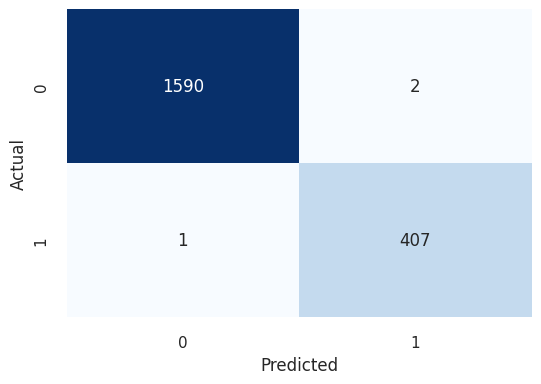

In [59]:
y_test_pred = best_pipeline.predict(X_test)

# Classification Report for Test Set
classif_report = classification_report(y_test, y_test_pred, output_dict=True)
classif_report_df = pd.DataFrame(classif_report).transpose()
print(f"\n{best_model_name} Classification Report on Test Set:")
print(tabulate(classif_report_df, headers='keys', tablefmt='psql', floatfmt='.3f'))

# Confusion Matrix for Best Model on Test Data
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Time to save our model!

In [60]:
import joblib
# save the best model
joblib.dump(best_pipeline, 'bank_churn_pipeline.pkl')

['bank_churn_pipeline.pkl']

If you would like to see my other works, you can visit:<br>
**[My website](https://estevanfisk.com/)** <br>
**[My GitHub](https://github.com/EstevanFisk)** <br>
**[My Kaggle](https://www.kaggle.com/bgfootball04)** <br>
Direct link to this file repository on my Github: **[Bank Churn Prediction](https://github.com/EstevanFisk/Bank-Customer-Churn-EDA-and-Prediction-Part-1)**.